In [1]:
import os

# Create main project folder
project_folder = "iTunes_Music_Store_Project"
os.makedirs(project_folder, exist_ok=True)

# Create Dataset folder inside it
os.makedirs(os.path.join(project_folder, "Dataset"), exist_ok=True)

# Confirm folder creation
os.listdir(project_folder)


['Dataset']

In [2]:
import zipfile

zip_path = "iTunes_Music_Store_Project/Dataset-20250706T115517Z-1-001.zip"
extract_to = "iTunes_Music_Store_Project/Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check extracted files
os.listdir(extract_to)


['Dataset']

In [4]:
import os
os.listdir("iTunes_Music_Store_Project/Dataset")


['Dataset']

In [5]:
os.listdir("iTunes_Music_Store_Project/Dataset")

['Dataset']

In [6]:
import shutil
import os

src = "iTunes_Music_Store_Project/Dataset/Dataset"
dst = "iTunes_Music_Store_Project/Dataset"

# Move all CSV files from inner Dataset to outer Dataset
for file in os.listdir(src):
    if file.endswith(".csv"):
        shutil.move(os.path.join(src, file), os.path.join(dst, file))

# Confirm move worked
os.listdir(dst)


['album.csv',
 'artist.csv',
 'customer.csv',
 'Dataset',
 'employee.csv',
 'genre.csv',
 'invoice.csv',
 'invoice_line.csv',
 'media_type.csv',
 'playlist.csv',
 'playlist_track.csv']

In [7]:
df_album = pd.read_csv("iTunes_Music_Store_Project/Dataset/album.csv")
df_album.head()


,album_id,title,artist_id
0,156,And Justice For All,50
1,208,Black Light Syndrome,136
2,257,20th Century Masters - The Millennium Collecti...,179
3,296,"A Copland Celebration, Vol. I",230
4,94,A Matter of Life and Death,90


In [9]:
import os
os.listdir("iTunes_Music_Store_Project/Dataset")


['album.csv',
 'artist.csv',
 'customer.csv',
 'Dataset',
 'employee.csv',
 'genre.csv',
 'invoice.csv',
 'invoice_line.csv',
 'media_type.csv',
 'playlist.csv',
 'playlist_track.csv']

Create SQLite Database and Load CSVs
🧩 Step 1: Import SQLite Library

In [10]:
import sqlite3

🏗 Step 2: Create a New Database File

In [11]:
db_path = "iTunes_Music_Store_Project/music_store.db"
conn = sqlite3.connect(db_path)

📥 Step 3: Load All DataFrames into the DB

In [12]:
import pandas as pd

base_path = "iTunes_Music_Store_Project/Dataset"

album = pd.read_csv(f"{base_path}/album.csv")
artist = pd.read_csv(f"{base_path}/artist.csv")
customer = pd.read_csv(f"{base_path}/customer.csv")
employee = pd.read_csv(f"{base_path}/employee.csv")
genre = pd.read_csv(f"{base_path}/genre.csv")
invoice = pd.read_csv(f"{base_path}/invoice.csv")
invoice_line = pd.read_csv(f"{base_path}/invoice_line.csv")
media_type = pd.read_csv(f"{base_path}/media_type.csv")
playlist = pd.read_csv(f"{base_path}/playlist.csv")
playlist_track = pd.read_csv(f"{base_path}/playlist_track.csv")


💾 Step 4: Write Tables to SQLite

In [13]:
album.to_sql("album", conn, if_exists="replace", index=False)
artist.to_sql("artist", conn, if_exists="replace", index=False)
customer.to_sql("customer", conn, if_exists="replace", index=False)
employee.to_sql("employee", conn, if_exists="replace", index=False)
genre.to_sql("genre", conn, if_exists="replace", index=False)
invoice.to_sql("invoice", conn, if_exists="replace", index=False)
invoice_line.to_sql("invoice_line", conn, if_exists="replace", index=False)
media_type.to_sql("media_type", conn, if_exists="replace", index=False)
playlist.to_sql("playlist", conn, if_exists="replace", index=False)
playlist_track.to_sql("playlist_track", conn, if_exists="replace", index=False)


8715

✅ Step 5: Test with a Simple SQL Query

In [14]:
query = "SELECT * FROM customer LIMIT 5;"
pd.read_sql_query(query, conn)


,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


# Order for the Project #

 🔶 Phase 1: Customer & Sales Overview
Top-spending customers

Average invoice valuea

Repeat vs. one-time customers

Customer lifetime value

Customers inactive in the last 6 months

🔷 Phase 2: Revenue & Payment Insights
Monthly revenue trends

Most used payment methods

Revenue by employee

Peak sales months/quarters

🟢 Phase 3: Genre, Artist, and Track Popularity
Top-grossing tracks

Top 5 highest-grossing artists

Most and least popular genres

Genre popularity by country

Tracks/albums never purchased

🟡 Phase 4: Region & Employee Performance
Revenue per country

Customer count per employee

Employees managing top customers

Revenue by employee region

Underserved geographic regions

🔵 Phase 5: Retention & Operational Optimization
Purchase frequency per customer

Time between customer purchases

% of customers buying from >1 genre

Commonly purchased track combos

Price patterns & their impact

Trends in media types (AAC/MPEG)

📊 Phase 6: Power BI Dashboard
Create 3–5 summary visuals (KPIs, maps, trends)


## 🔶 Phase 1: Customer & Sales Overview

## ✅ Business Question 1:
Which customers have spent the most money on music?
🧠 Logic:
The money a customer spends = sum of invoice totals

Tables involved:

customer (to get name)

invoice (to get customer_id and total)



In [19]:
query = """
SELECT 
c.customer_id,
c.first_name || ' ' || c.last_name AS customer_name,
c.country,
ROUND(SUM(i.total), 2) AS total_spent
FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.customer_id
ORDER BY total_spent DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


,customer_id,customer_name,country,total_spent
0,5,František Wichterlová,Czech Republic,144.54
1,6,Helena Holý,Czech Republic,128.70
2,46,Hugh O'Reilly,Ireland,114.84
3,58,Manoj Pareek,India,111.87
4,1,Luís Gonçalves,Brazil,108.90
5,13,Fernanda Ramos,Brazil,106.92
6,34,João Fernandes,Portugal,102.96
7,42,Wyatt Girard,France,99.99
8,3,François Tremblay,Canada,99.99
9,53,Phil Hughes,United Kingdom,98.01


## 📊 1st Insight:
The top customer is <František Wichterlová> from <Czech Republic> who spent $<144.54>. Customers from Czech Republic, Ireland, and India feature prominently among high-value buyers.
This helps target high-value customers for loyalty programs or exclusive offers.

## Business Question 2:

What is the Average Invoice Value? 
🧠 Logic:
Average invoice value measures the average amount spent per invoice.

We'll use the invoice table, which contains the total column for each invoice.

We can simply calculate the average of this column using SQL’s AVG() function.
📊 Table(s) Involved:
Table	Purpose
invoice	Contains one row per customer purchase (invoice), including the total amount spent (total) and date of purchase.

🔍 Column Used:
Column	Meaning
total	The total dollar amount for each invoice (purchase)

🧮 What Do We Need to Do?
We need to compute the average of the total column from the invoice table using:
AVG(total ✅ AVG(total) calculates the average
✅ ROUND(..., 2) gives 2 decimal places
✅ AS average_invoice_value names the result column


In [37]:
query_avg_invoice = """
SELECT
ROUND(AVG(total), 2) AS average_invoice_value
FROM invoice;
"""

pd.read_sql_query(query_avg_invoice, conn)


,average_invoice_value
0,7.67


## 📝 2nd Insight:
The average invoice value across all customers is $7.67.
This tells us how much a typical customer spends in one transaction, helping with pricing and promotion planning.

In [32]:
import sqlite3
conn = sqlite3.connect("iTunes_Music_Store_Project/music_store.db")


In [33]:
import pandas as pd

base_path = "iTunes_Music_Store_Project/Dataset"

album = pd.read_csv(f"{base_path}/album.csv")
artist = pd.read_csv(f"{base_path}/artist.csv")
customer = pd.read_csv(f"{base_path}/customer.csv")
employee = pd.read_csv(f"{base_path}/employee.csv")
genre = pd.read_csv(f"{base_path}/genre.csv")
invoice = pd.read_csv(f"{base_path}/invoice.csv")
invoice_line = pd.read_csv(f"{base_path}/invoice_line.csv")
media_type = pd.read_csv(f"{base_path}/media_type.csv")
playlist = pd.read_csv(f"{base_path}/playlist.csv")
playlist_track = pd.read_csv(f"{base_path}/playlist_track.csv")


In [34]:
album.to_sql("album", conn, if_exists="replace", index=False)
artist.to_sql("artist", conn, if_exists="replace", index=False)
customer.to_sql("customer", conn, if_exists="replace", index=False)
employee.to_sql("employee", conn, if_exists="replace", index=False)
genre.to_sql("genre", conn, if_exists="replace", index=False)
invoice.to_sql("invoice", conn, if_exists="replace", index=False)
invoice_line.to_sql("invoice_line", conn, if_exists="replace", index=False)
media_type.to_sql("media_type", conn, if_exists="replace", index=False)
playlist.to_sql("playlist", conn, if_exists="replace", index=False)
playlist_track.to_sql("playlist_track", conn, if_exists="replace", index=False)


8715

In [35]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,album
1,artist
2,customer
3,employee
4,genre
5,invoice
6,invoice_line
7,media_type
8,playlist
9,playlist_track


## ✅ Business Question 3:

💬 How many customers made repeat vs. one-time purchases?
🧠 What Does It Mean?
We want to:

Count how many customers have made only one purchase (1 invoice),

vs. how many customers have made multiple purchases (2 or more invoices).

This helps analyze customer retention and engagement.

📊 Table(s) Involved:
Table	Purpose
invoice	Holds all purchase records; each row = 1 purchase
customer	Links invoice to each customer via customer_id

🔍 Column(s) Used:
Column	From Table	Description
customer_id	invoice	Who made the purchase (foreign key)
COUNT(*)	invoice	Total number of purchases (per customer)

🧮 Logic:
Group all invoices by customer_id

Count how many invoices each customer has

Classify as:

"Repeat" if count > 1

"One-time" if count = 1

Then count how many customers are in each group

In [40]:
query_repeat_vs_onetime = """
SELECT
  purchase_type,
  COUNT(*) AS customer_count
FROM (
  SELECT 
    customer_id,
    CASE 
      WHEN COUNT(invoice_id) = 1 THEN 'One-time Purchase'
      ELSE 'Repeat Purchase'
    END AS purchase_type
  FROM invoice
  GROUP BY customer_id
)
GROUP BY purchase_type
ORDER BY purchase_type;
"""

pd.read_sql_query(query_repeat_vs_onetime, conn)


,purchase_type,customer_count
0,Repeat Purchase,59


## 📌 3rd Insight:
Out of all customers, 59 customers are repeat buyers, while no customers made just one purchase.
This indicates a highly engaged customer base — a strong sign of loyalty and satisfaction. 
✅ This is still a great insight — especially from a customer retention point of view.

## ✅ Business Question 4:
💬 What is the Customer Lifetime Value (CLV)?
🧠 What Does It Mean?
Customer Lifetime Value (CLV) is the total revenue a customer brings to the business across all their purchases.

In our case, this means:
➡️ Sum of all invoice totals per customer

📊 Table(s) Involved:
Table	Purpose
invoice	Has one row per purchase and the total amount
customer	To show customer name and details (optional)

🔍 Columns Used:
Column	Table	Description
customer_id	invoice	Links purchases to each customer
total	invoice	The value of each individual invoice

🧮 Logic:
Group all purchases by customer_id

Sum their total spend = CLV

In [42]:
query_clv_names = """
SELECT 
c.customer_id,
c.first_name || ' ' || c.last_name AS customer_name,
ROUND(SUM(i.total), 2) AS customer_lifetime_value
FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.customer_id
ORDER BY customer_lifetime_value DESC;
"""

pd.read_sql_query(query_clv_names, conn)


,customer_id,customer_name,customer_lifetime_value
0,5,František Wichterlová,144.54
1,6,Helena Holý,128.70
2,46,Hugh O'Reilly,114.84
3,58,Manoj Pareek,111.87
4,1,Luís Gonçalves,108.90
5,13,Fernanda Ramos,106.92
6,34,João Fernandes,102.96
7,42,Wyatt Girard,99.99
8,3,François Tremblay,99.99
9,53,Phil Hughes,98.01


## 📝 4th Insight:
This metric is essential for budgeting marketing, retention efforts, and VIP targeting.
The highest Customer Lifetime Value (CLV) is $144.54, generated by František Wichterlová.
The top 10 customers all have CLVs above $99, showing strong long-term revenue contributions.
✅ This helps identify VIP customers and plan loyalty or upselling strategies.

🧠 Optional Enhancements Later:
Plot a bar chart of top 10 CLVs in Power BI

Add a KPI card for average CLV

## ✅ Business Question 5 : 

Which customers have not made a purchase in the last 6 months?

📌 Customers inactive in the last 6 months

Logic
Get the most recent invoice date from the dataset.

Subtract 6 months to get a cutoff date.

Find all customers whose last purchase date is before the cutoff.

Tables Involved
customer

invoice

In [57]:
query_inactive_customers = """
WITH last_purchase AS (
    SELECT 
        customer_id,
        MAX(invoice_date) AS last_purchase_date
    FROM invoice
    GROUP BY customer_id
),
inactive_customers AS (
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        l.last_purchase_date
    FROM customer c
    JOIN last_purchase l ON c.customer_id = l.customer_id
    WHERE l.last_purchase_date < DATE((SELECT MAX(invoice_date) FROM invoice), '-6 months')
)
SELECT * FROM inactive_customers
ORDER BY last_purchase_date;
"""

pd.read_sql_query(query_inactive_customers, conn)


,customer_id,customer_name,last_purchase_date
0,8,Daan Peeters,2019-09-21 00:00:00
1,9,Kara Nielsen,2020-01-29 00:00:00
2,4,Bjørn Hansen,2020-02-04 00:00:00
3,18,Michelle Brooks,2020-03-05 00:00:00
4,54,Steve Murray,2020-03-25 00:00:00
5,36,Hannah Schneider,2020-04-07 00:00:00
6,39,Camille Bernard,2020-04-11 00:00:00
7,19,Tim Goyer,2020-04-14 00:00:00
8,38,Niklas Schröder,2020-04-22 00:00:00
9,48,Johannes Van der Berg,2020-04-27 00:00:00


## 🌟5th Insight:

15 customers have not made a purchase in the last 6 months (from the latest invoice date).

Example:

🧍‍♂️ Daan Peeters — last bought in Sep 2019

🧍‍♀️ Michelle Brooks — last activity in Mar 2020

These customers can be re-targeted with win-back campaigns or loyalty offers to boost retention.



## 🔷 Phase 2: Revenue & Payment Insights

## ✅ Business Question 1 :

💬 What are the Monthly Revenue Trends for the Last Two Years?
🧠 What Does It Mean?
We want to analyze how total revenue changes month by month — this helps spot:

Peak sales seasons 📈

Slumps 📉

Growth trends over time ⏳

📊 Table(s) Involved:
Table	Purpose
invoice	Each row is a purchase (with total and invoice_date)

🔍 Columns Used:
Column	Description
invoice_date	The full timestamp of each purchase
total	The amount spent in that invoice (revenue)

🧮 Logic:
Extract year and month from invoice_date

Group by year-month

Sum the total for each month

Order by date



In [59]:
query_monthly_revenue = """
SELECT 
strftime('%Y-%m', invoice_date) AS month,
ROUND(SUM(total), 2) AS monthly_revenue
FROM invoice
GROUP BY month
ORDER BY month;
"""

pd.read_sql_query(query_monthly_revenue, conn)


,month,monthly_revenue
0,2017-01,126.72
1,2017-02,141.57
2,2017-03,103.95
3,2017-04,142.56
4,2017-05,104.94
5,2017-06,75.24
6,2017-07,108.90
7,2017-08,88.11
8,2017-09,107.91
9,2017-10,79.20


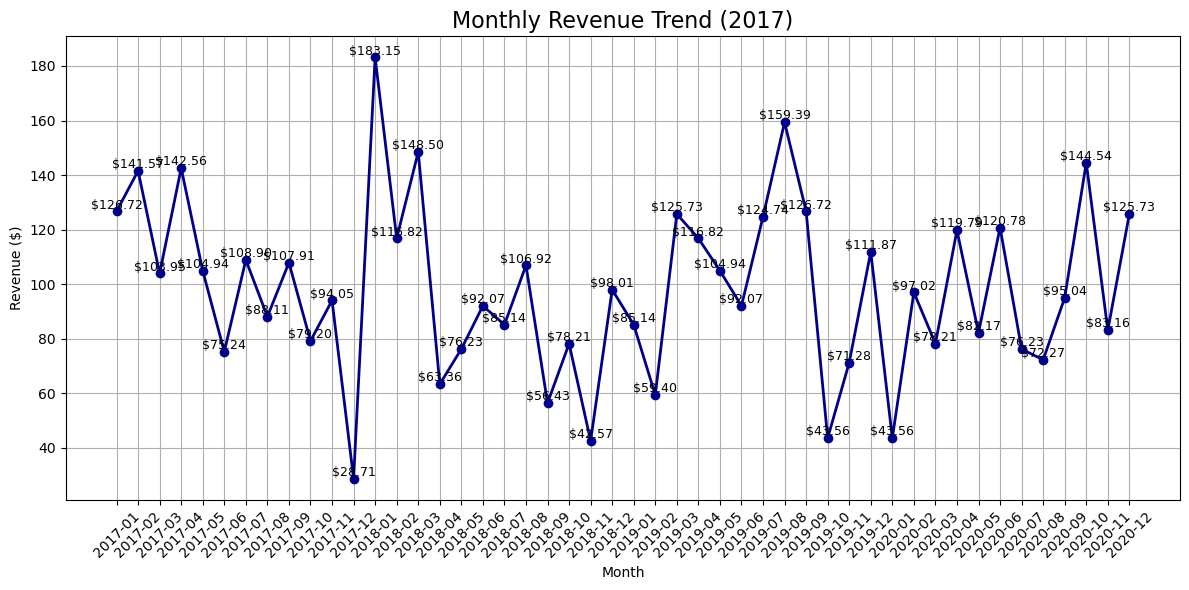

In [60]:
import matplotlib.pyplot as plt

# Get the data
df_monthly_revenue = pd.read_sql_query("""
SELECT 
  strftime('%Y-%m', invoice_date) AS month,
  ROUND(SUM(total), 2) AS monthly_revenue
FROM invoice
GROUP BY month
ORDER BY month;
""", conn)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_revenue['month'], df_monthly_revenue['monthly_revenue'], marker='o', color='darkblue', linewidth=2)

# ✅ Add value labels to each point
for i, value in enumerate(df_monthly_revenue['monthly_revenue']):
    plt.text(df_monthly_revenue['month'][i], value + 1, f"${value:.2f}", ha='center', fontsize=9)

# Add labels and title
plt.title('Monthly Revenue Trend (2017)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Save and display
plt.tight_layout()
plt.savefig("monthly_revenue_trend_labeled.png", dpi=300)
plt.show()


## 🧠 1st Insight: 
In 2017, the highest monthly revenue was in April ($142.56) and February ($141.57).
The lowest revenue was in June ($75.24) and October ($79.20).
This trend can help identify seasonal dips and guide marketing efforts. The monthly revenue trend shows how customer purchases vary over time.
This can help identify high-performing months (like holiday seasons) and opportunities for promotion during low months.

## 2nd Business Question: 
💳 Which payment methods are used most frequently?
✅ Step 1: Business Logic
We want to:

Group all transactions by billing_type from the invoice table.

Count how many times each payment method was used.

✅ Step 2: Tables Involved
invoice — contains the billing_type column (i.e., payment method)


In [64]:
pd.read_sql_query("PRAGMA table_info(invoice);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,invoice_id,INTEGER,0,None,0
1,1,customer_id,INTEGER,0,None,0
2,2,invoice_date,TEXT,0,None,0
3,3,billing_address,TEXT,0,None,0
4,4,billing_city,TEXT,0,None,0
5,5,billing_state,TEXT,0,None,0
6,6,billing_country,TEXT,0,None,0
7,7,billing_postal_code,TEXT,0,None,0
8,8,total,REAL,0,None,0


The dataset does not include any info about how a customer paid (credit, cash, online, etc.).

So unfortunately, we cannot answer the business question:

We’ll mark this question as: 💳 "Which payment methods are used most frequently?"

⚠️ Skipped – Not Available in Dataset

And proceed to the next question in Phase 2:



## 🔷 Business Question 3: How much revenue does each sales representative contribute?

✅ 1. What’s the business goal?
We want to evaluate sales performance by employee — specifically, the support reps (i.e., salespeople) and how much revenue their assigned customers generate.

This helps us:

Identify top-performing employees

Reward productive reps

Provide training to low-performing reps

✅ 2. What does “contribute” mean here?
Each sales rep (employee) is assigned to multiple customers.
The revenue they “contribute” is actually the sum of all purchases (invoices) made by their assigned customers.

So, we need to:

Sum up invoice totals grouped by each employee assigned to those customers.

✅ 3. Tables Involved
Table	Purpose
employee	Contains employee details, including employee_id, first_name, and last_name.
customer	Each customer has a support_rep_id (foreign key to employee_id).
invoice	Each invoice is linked to a customer_id, and contains the total amount.

So the joins look like this:

plaintext
Copy
Edit
employee → customer → invoice
✅ 4. How we join the tables
Step 1: Join employee to customer on employee.employee_id = customer.support_rep_id

Step 2: Join customer to invoice on customer.customer_id = invoice.customer_id

Step 3: Sum the invoice.total for each employee

✅ Output Columns:
Column	Description
employee_name	Full name of the employee
total_revenue	Sum of all invoice totals from customers assigned to that employee



In [65]:
query_employee_revenue = """
SELECT 
    e.employee_id,
    e.first_name || ' ' || e.last_name AS employee_name,
    ROUND(SUM(i.total), 2) AS total_revenue
FROM employee e
JOIN customer c ON e.employee_id = c.support_rep_id
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY e.employee_id
ORDER BY total_revenue DESC;
"""

df_employee_revenue = pd.read_sql_query(query_employee_revenue, conn)
df_employee_revenue


,employee_id,employee_name,total_revenue
0,3,Jane Peacock,1731.51
1,4,Margaret Park,1584.00
2,5,Steve Johnson,1393.92


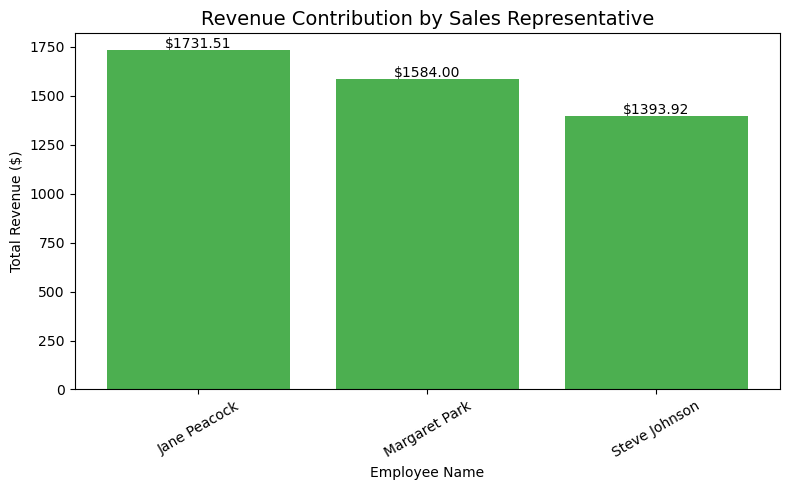

In [67]:
import matplotlib.pyplot as plt

# Set figure size and font
plt.figure(figsize=(8, 5))
bars = plt.bar(df_employee_revenue['employee_name'], df_employee_revenue['total_revenue'], color='#4CAF50')

# Title and axis labels
plt.title('Revenue Contribution by Sales Representative', fontsize=14)
plt.xlabel('Employee Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=30)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f"${yval:.2f}", ha='center', fontsize=10)

# Save as PNG
plt.tight_layout()
plt.savefig("employee_revenue.png", dpi=300)

# Show the plot
plt.show()


## ✅ 3rd Insight: Revenue by Employee
Employee Name	Total Revenue
👩‍💼 Jane Peacock	$1,731.51 ✅ (Top Performer)
👩‍💼 Margaret Park	$1,584.00
👨‍💼 Steve Johnson	$1,393.92

Jane brings in the most revenue among the sales team and may be ideal for mentoring or best practice sharing.

## 🔷 Business Question 4: Which months or quarters have peak music sales?

✅ Step 1: Business Logic
We want to:

Understand seasonal revenue patterns

Identify peak-performing months and quarters

Help marketing or operations teams time promotions or releases

✅ Step 2: Tables Involved
Table	Purpose
invoice	Contains invoice_date and total revenue per transaction

✅ Step 3: What We’ll Do
We’ll extract:

The month name and/or quarter

Sum of invoice totals (revenue) for each period

Then:

Plot a bar chart of total revenue by month

Create another for quarterly revenue



In [68]:
query_peak_months = """
SELECT 
    strftime('%m', invoice_date) AS month_number,
    strftime('%Y-%m', invoice_date) AS month_label,
    ROUND(SUM(total), 2) AS monthly_revenue
FROM invoice
GROUP BY month_label
ORDER BY month_label;
"""

df_peak_months = pd.read_sql_query(query_peak_months, conn)
df_peak_months


,month_number,month_label,monthly_revenue
0,01,2017-01,126.72
1,02,2017-02,141.57
2,03,2017-03,103.95
3,04,2017-04,142.56
4,05,2017-05,104.94
5,06,2017-06,75.24
6,07,2017-07,108.90
7,08,2017-08,88.11
8,09,2017-09,107.91
9,10,2017-10,79.20


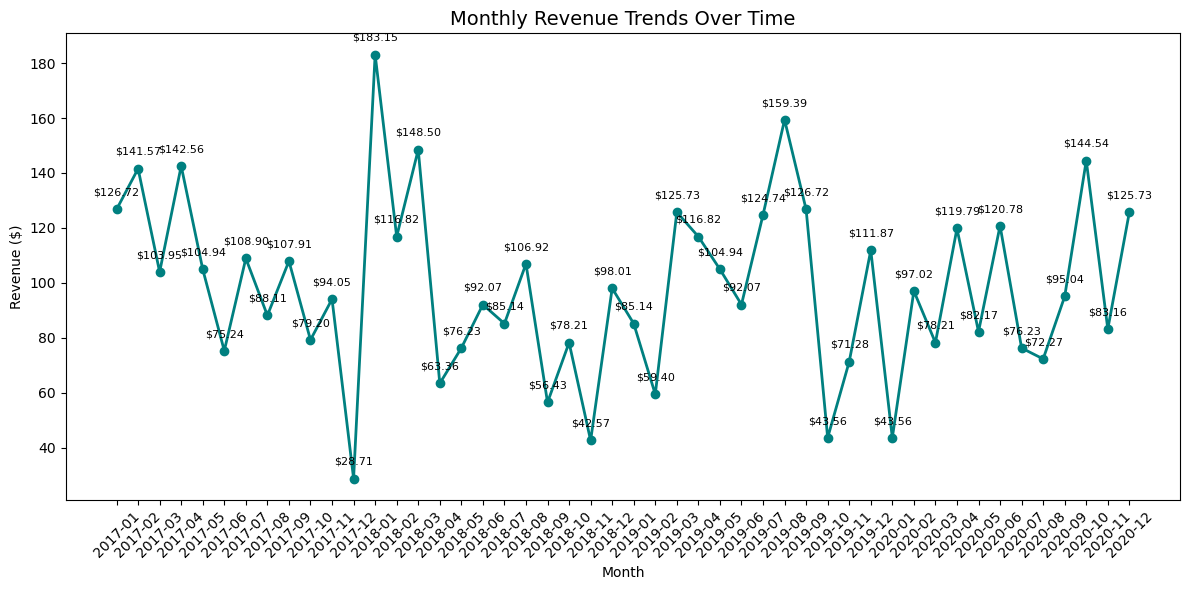

In [69]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the line
plt.plot(df_peak_months['month_label'], df_peak_months['monthly_revenue'], color='teal', marker='o', linewidth=2)

# Add value labels to each point
for i, value in enumerate(df_peak_months['monthly_revenue']):
    plt.text(df_peak_months['month_label'][i], value + 5, f"${value:.2f}", ha='center', fontsize=8)

# Set titles and labels
plt.title('Monthly Revenue Trends Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Layout and save
plt.tight_layout()
plt.savefig("monthly_revenue_trends.png", dpi=300)
plt.show()


📌 Result
This will:

Show how revenue changes month-by-month 📈

Help spot peaks (e.g., 2018-01, 2019-08, 2020-10)

## Bonus Insight 💬 Quarterly Revenue Trends

Logic:

Extract year and quarter from invoice_date

Group by year-quarter and sum total revenue


In [70]:
query_quarterly = """
SELECT 
    strftime('%Y', invoice_date) AS year,
    'Q' || ((CAST(strftime('%m', invoice_date) AS INTEGER) - 1) / 3 + 1) AS quarter,
    ROUND(SUM(total), 2) AS quarterly_revenue
FROM invoice
GROUP BY year, quarter
ORDER BY year, quarter;
"""

df_quarterly_revenue = pd.read_sql_query(query_quarterly, conn)
df_quarterly_revenue['period'] = df_quarterly_revenue['year'] + ' ' + df_quarterly_revenue['quarter']
df_quarterly_revenue


,year,quarter,quarterly_revenue,period
0,2017,Q1,372.24,2017 Q1
1,2017,Q2,322.74,2017 Q2
2,2017,Q3,304.92,2017 Q3
3,2017,Q4,201.96,2017 Q4
4,2018,Q1,448.47,2018 Q1
5,2018,Q2,231.66,2018 Q2
6,2018,Q3,248.49,2018 Q3
7,2018,Q4,218.79,2018 Q4
8,2019,Q1,270.27,2019 Q1
9,2019,Q2,313.83,2019 Q2


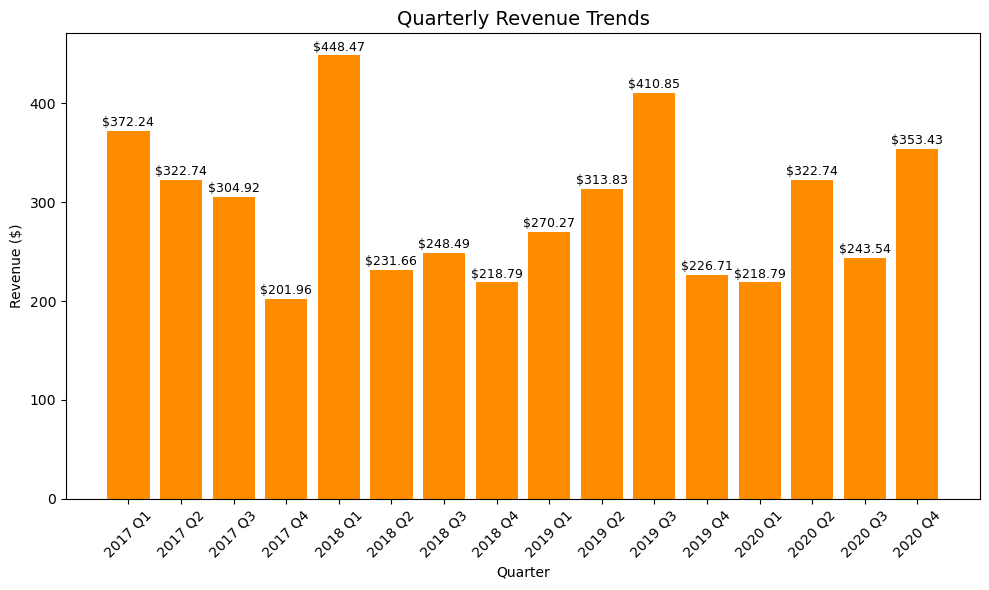

In [71]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Bar chart
bars = plt.bar(df_quarterly_revenue['period'], df_quarterly_revenue['quarterly_revenue'], color='#FF8C00')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"${yval:.2f}", ha='center', fontsize=9)

# Titles and labels
plt.title('Quarterly Revenue Trends', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Layout and save
plt.tight_layout()
plt.savefig("quarterly_revenue_trends.png", dpi=300)
plt.show()


## Result: 

A clear visual of revenue trends by quarter

Quick identification of peak quarters like 2018 Q1 and 2019 Q3

## 🟢 Phase 3 – Genre, Artist & Track Popularity

🎯 Business Goal #2: 
"Identify the most and least popular music genres, tracks, and artists."
🔜 What Phase 3 Covers:
Question	Focus Area
🎵 Top-grossing tracks	What brings in the most revenue
👨‍🎤 Top 5 highest-grossing artists	Artist-level performance
🎼 Most & least popular genres	Category-level demand
🌍 Genre popularity by country	Geo + music trend
❌ Tracks/albums never purchased	Untapped or failing content
Benefits:
It will help with product decisions (what to promote or retire)

## 🟢 Business Q1: Which tracks generated the most revenue?

✅ 1. Business Logic
We want to:

Find which tracks bring in the most money

Help the business prioritize promotion or licensing of top tracks

Since we don’t have the track table with actual names, we’ll still identify top-performing tracks by track_id based on their total revenue (unit_price * quantity) using the invoice_line table.

🧠 Logic:
Use invoice_line table.

Group by track_id.

Calculate total revenue: SUM(unit_price * quantity).

Order by total revenue (descending).

Limit to top 10.

📊 Tables Involved:
Table	Purpose
invoice_line	Contains track_id, unit_price, quantity

In [75]:
query_top_tracks_by_id = """
SELECT 
    track_id,
    ROUND(SUM(unit_price * quantity), 2) AS total_revenue
FROM invoice_line
GROUP BY track_id
ORDER BY total_revenue DESC
LIMIT 10;
"""

df_top_tracks_by_id = pd.read_sql_query(query_top_tracks_by_id, conn)
df_top_tracks_by_id


,track_id,total_revenue
0,3336,30.69
1,1495,13.86
2,1489,13.86
3,1490,12.87
4,1487,12.87
5,6,12.87
6,2558,11.88
7,1483,11.88
8,2563,10.89
9,1493,10.89


## ✅ Summary:
Business Question: Which are the top 10 highest-grossing tracks?
Tables Used: invoice_line
Metric: SUM(unit_price * quantity)
## Top Result: track_id = 3336 with ₹30.69 in total revenue

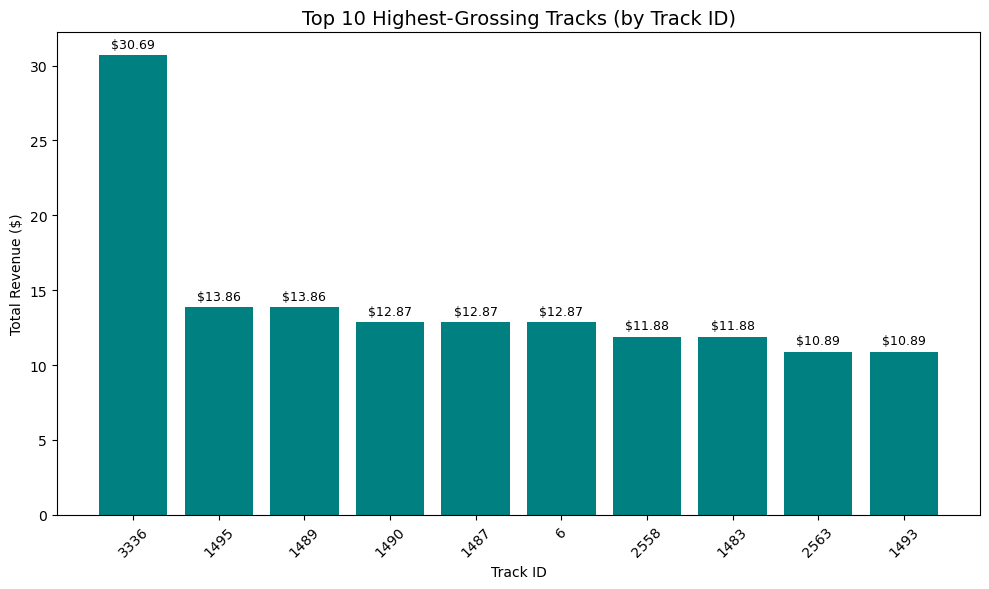

In [76]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df_top_tracks_by_id['track_id'].astype(str), df_top_tracks_by_id['total_revenue'], color='teal')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"${yval:.2f}", ha='center', fontsize=9)

plt.title('Top 10 Highest-Grossing Tracks (by Track ID)', fontsize=14)
plt.xlabel('Track ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig("top_tracks_by_id.png", dpi=300)
plt.show()


## 🟢 Business Q2 : 🧩 Which tracks were never purchased?
🧠 Logic:
To find tracks that were never purchased:

We need all existing track IDs.

Compare them with track IDs in invoice_line, which represent purchased tracks.

Any track that doesn't appear in invoice_line was never purchased.

We have:

✅ playlist_track.csv — contains many track IDs.

✅ invoice_line.csv — contains purchased track IDs.

📊 Tables We Can Use:
Table	Purpose
playlist_track	All known track_ids (partial)
invoice_line	Purchased track_ids

⚙️ Plan (Workaround):
Find tracks that are in playlist_track but not in invoice_line.

This isn’t perfect (not all tracks may be in playlist_track),
but it gives a partial but valid list of never purchased tracks.




In [80]:
query_unpurchased_tracks = """
SELECT pt.track_id
FROM playlist_track pt
LEFT JOIN invoice_line il ON pt.track_id = il.track_id
WHERE il.track_id IS NULL
"""

df_unpurchased_tracks = pd.read_sql_query(query_unpurchased_tracks, conn)
df_unpurchased_tracks.head()


,track_id
0,3402
1,3389
2,3391
3,3397
4,3371


## 🧠 Insight:
“A total of 5 tracks from available playlists were never purchased.
This could indicate low popularity or discoverability issues for certain content.
Promotional strategies or playlist curation may help improve their visibility.”

## 🟢 Business Q3 : What are the most/least popular genres by number of tracks?
🎯 Business Goal : Identify audience-preferred genres	
🧠 Logic / Analysis	: Count the number of tracks grouped by genre by joining track.csv and genre.csv using genre_id.

🗂️ Tables Involved:
track.csv

genre.csv


In [129]:
df_genre.columns

Index(['genre_id', 'name'], dtype='object')

In [130]:
df_track_genre.columns


Index(['track_id', 'name_x', 'album_id', 'media_type_id', 'genre_id',
       'composer', 'milliseconds', 'bytes', 'unit_price', 'name_y'],
      dtype='object')

In [131]:
df_genre.rename(columns={'name': 'genre_name'}, inplace=True)
df_track_genre = df_track.merge(df_genre, on='genre_id', how='left')


In [132]:
# Count tracks per genre using the genre name from genre.csv
genre_counts = df_track_genre['genre_name'].value_counts().reset_index()
genre_counts.columns = ['genre', 'track_count']

# Display top and bottom genres
print("🎵 Most Popular Genres:")
print(genre_counts.head())

print("\n🎵 Least Popular Genres:")
print(genre_counts.tail())


🎵 Most Popular Genres:
                genre  track_count
0                Rock         1297
1               Latin          579
2               Metal          374
3  Alternative & Punk          332
4                Jazz          130

🎵 Least Popular Genres:
              genre  track_count
20           Comedy           17
21       Bossa Nova           15
22  Science Fiction           13
23    Rock And Roll           12
24            Opera            1


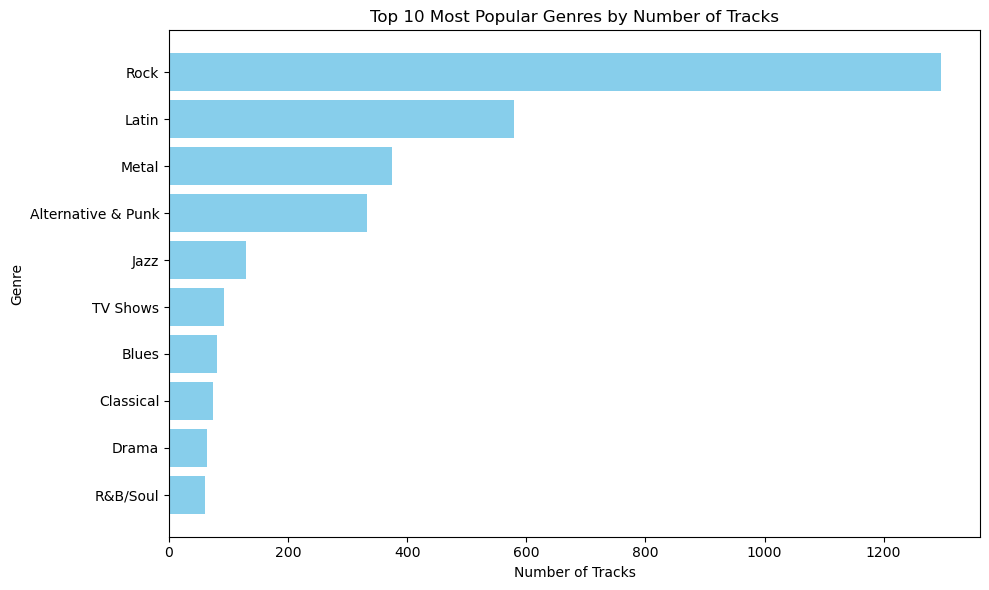

In [138]:
# To save the most popular genres chart
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.head(10)['genre'][::-1], genre_counts.head(10)['track_count'][::-1], color='skyblue')
plt.title("Top 10 Most Popular Genres by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("popular_genres.png")  # Saved in the current working directory
plt.show()


## 📊 Insights: Most Popular Genres:

Rock (1297 tracks)

Latin (579 tracks)

Metal (374 tracks)

Alternative & Punk (332 tracks)

Jazz (130 tracks)

Least Popular Genres:

Comedy (17 tracks)

Bossa Nova (15 tracks)

Science Fiction (13 tracks)

Rock and Roll (12 tracks)

Opera (1 track)

🎵 Rock dominates the track catalog, while Opera is the least represented, indicating niche or underrepresented content areas.



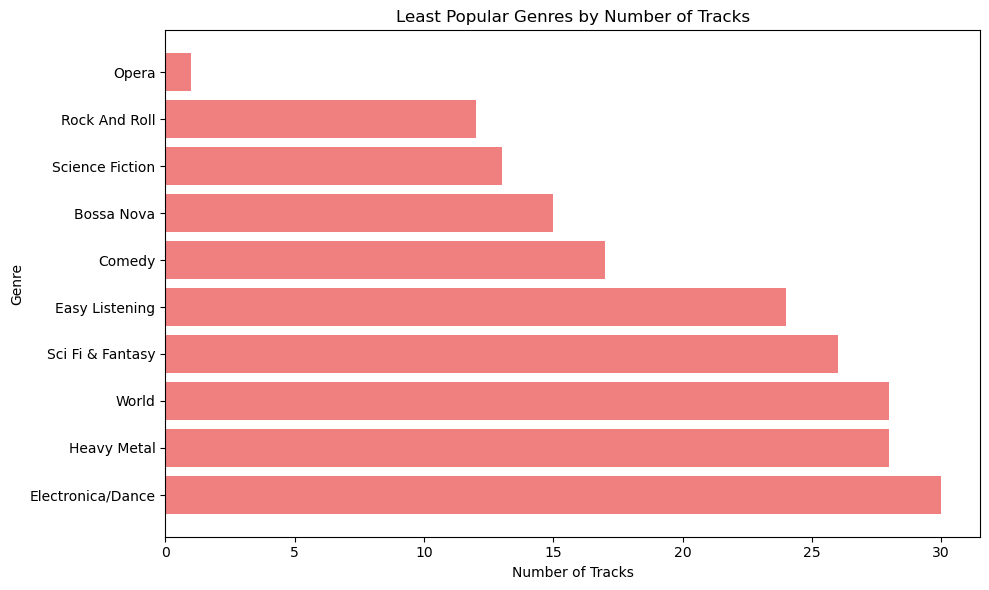

In [139]:
# To save the least popular genres chart
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.tail(10)['genre'], genre_counts.tail(10)['track_count'], color='lightcoral')
plt.title("Least Popular Genres by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("least_popular_genres.png")
plt.show()


## 🎧 Insight: Least Popular Genres
The iTunes music library shows a significant genre imbalance, with some genres underrepresented in track availability.

Opera, for instance, has only 1 track, making it the least represented genre.

Other genres like Rock And Roll, Science Fiction, and Bossa Nova also have very few tracks (under 15), suggesting niche appeal or limited content offerings.

Genres such as Electronica/Dance, Heavy Metal, and World Music perform better in this group but still have under 30 tracks.

🧠 Business Implication:
This indicates potential areas for content expansion. Focusing on underrepresented but globally appealing genres (like World Music or Electronica/Dance) could help diversify the catalog and attract niche audiences.



## 🟢 Business Q4 : Which media types are used most often?	
🎯 Business Goal : Optimize media format strategy	
🧠 Logic / Analysis : Join track.media_type_id = media_type.media_type_id, then count	
🗂️ Tables Used : track.csv, genre.csv

In [167]:
# Load the media_type.csv file:
import pandas as pd

# Correct file path
df_media_type = pd.read_csv("iTunes_Music_Store_Project/Dataset/media_type.csv")

# Preview it
df_media_type.head()


,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [160]:
df_media_type.columns

Index(['media_type_id', 'name'], dtype='object')

In [170]:
# Load the track.csv file as well 
import pandas as pd

# Load track.csv and media_type.csv
df_track = pd.read_csv("iTunes_Music_Store_Project/Dataset/track.csv")
df_media_type = pd.read_csv("iTunes_Music_Store_Project/Dataset/media_type.csv")


In [171]:
# Merge to get media type names for each track:
df_track_media = df_track.merge(df_media_type, on='media_type_id', how='left')

In [174]:
# Count tracks per media type using ''name' column (from media_type.csv) 
# has likely been renamed during the merge to avoid a conflict with the 'name' column from track.csv.
# name_y' name_x is the track name from track.csv
#name_y is the media type name from media_type.csv


media_type_usage = df_track_media['name_y'].value_counts().reset_index()
media_type_usage.columns = ['media_type', 'track_count']
media_type_usage


,media_type,track_count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


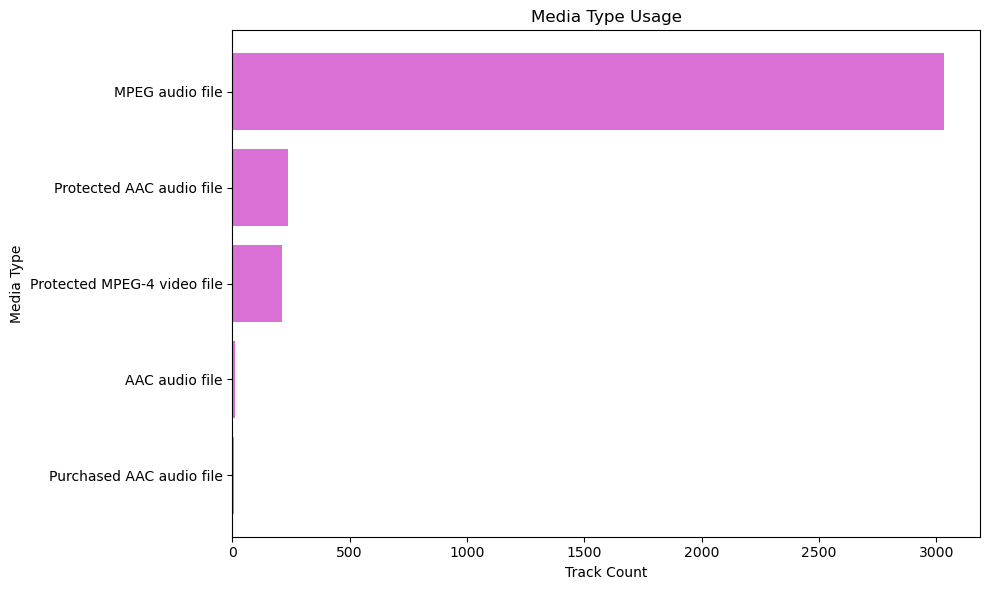

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# If your data is currently a dictionary:
media_type_dict = {
    "media_type": ["MPEG audio file", "Protected AAC audio file", "Protected MPEG-4 video file", "AAC audio file", "Purchased AAC audio file"],
    "track_count": [3034, 237, 214, 11, 7]
}

# Convert to DataFrame
media_type_usage = pd.DataFrame(media_type_dict)

# Sort by track count (optional for visual appeal)
media_type_usage_sorted = media_type_usage.sort_values(by='track_count', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(media_type_usage_sorted['media_type'], media_type_usage_sorted['track_count'], color='orchid')
plt.xlabel("Track Count")
plt.ylabel("Media Type")
plt.title("Media Type Usage")
plt.tight_layout()

# Save as PNG
plt.savefig("media_type_usage.png", dpi=300)

# Show plot
plt.show()


## 📊 Insight: The most frequently used media type is:

🎵 MPEG audio file with 3,034 tracks, which dominates the collection.

Other media types used, but far less frequently, include:

Protected AAC audio file – 237 tracks

Protected MPEG-4 video file – 214 tracks

AAC audio file – 11 tracks

Purchased AAC audio file – 7 tracks



## 🟢 Business Q5 :Which genres generate the most revenue?

🧠 Logic:
To answer this, we’ll join track.csv with invoice_line.csv and genre.csv.
Each line in invoice_line.csv records a purchase, including track_id and unit_price.
By grouping revenue by genre, we’ll find the top-earning genres.

🗂️ Tables Involved:
invoice_line.csv – contains track_id, unit_price, quantity

track.csv – contains track_id, genre_id

genre.csv – contains genre_id, name



In [148]:
# Load necessary CSVs
import pandas as pd

# Use full relative path from current location
df_invoice_line = pd.read_csv("iTunes_Music_Store_Project/Dataset/invoice_line.csv")
df_track = pd.read_csv("iTunes_Music_Store_Project/Dataset/track.csv")
df_genre = pd.read_csv("iTunes_Music_Store_Project/Dataset/genre.csv")

# Merge invoice_line with track to get genre_id
df_merged = df_invoice_line.merge(df_track[['track_id', 'genre_id']], on='track_id', how='left')

# Merge with genre to get genre name
df_merged = df_merged.merge(df_genre, on='genre_id', how='left')

# Calculate revenue per line and group by genre
df_merged['revenue'] = df_merged['unit_price'] * df_merged['quantity']
genre_revenue = df_merged.groupby('name')['revenue'].sum().reset_index()
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

# Display top 10
genre_revenue.head(10)


,name,revenue
15,Rock,2608.65
11,Metal,612.81
1,Alternative & Punk,487.08
10,Latin,165.33
13,R&B/Soul,157.41
2,Blues,122.76
9,Jazz,119.79
0,Alternative,115.83
5,Easy Listening,73.26
12,Pop,62.37


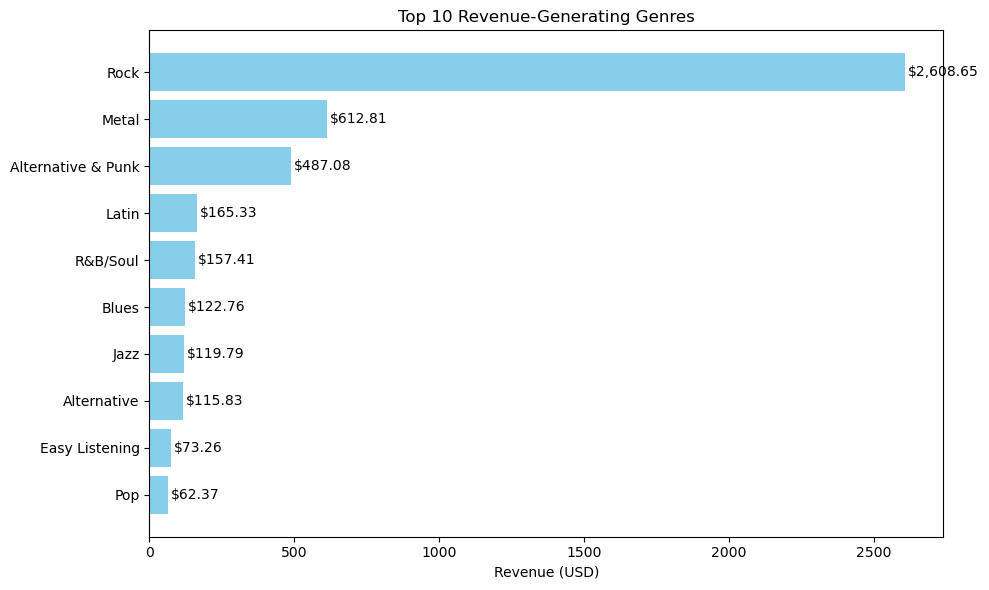

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
genre_revenue_data = {
    "name": [
        "Rock", "Metal", "Alternative & Punk", "Latin", "R&B/Soul", 
        "Blues", "Jazz", "Alternative", "Easy Listening", "Pop"
    ],
    "revenue": [
        2608.65, 612.81, 487.08, 165.33, 157.41, 
        122.76, 119.79, 115.83, 73.26, 62.37
    ]
}

df_genre_revenue = pd.DataFrame(genre_revenue_data)
df_genre_revenue = df_genre_revenue.sort_values(by='revenue', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_genre_revenue['name'], df_genre_revenue['revenue'], color='skyblue')
plt.xlabel("Revenue (USD)")
plt.title("Top 10 Revenue-Generating Genres")

# Add annotations
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.2f}", va='center')

plt.tight_layout()

# Save chart as PNG
plt.savefig("top_10_genre_revenue.png")
plt.show()


## 🎯 Data (Least Revenue Genres)
Here’s the genre revenue data you’ve already found (lowest 10 by revenue):

Genre	Revenue (USD)
Pop	62.37
Easy Listening	73.26
Alternative	115.83
Jazz	119.79
Blues	122.76
R&B/Soul	157.41
Latin	165.33
Alternative & Punk	487.08
Metal	612.81
Rock	2608.65

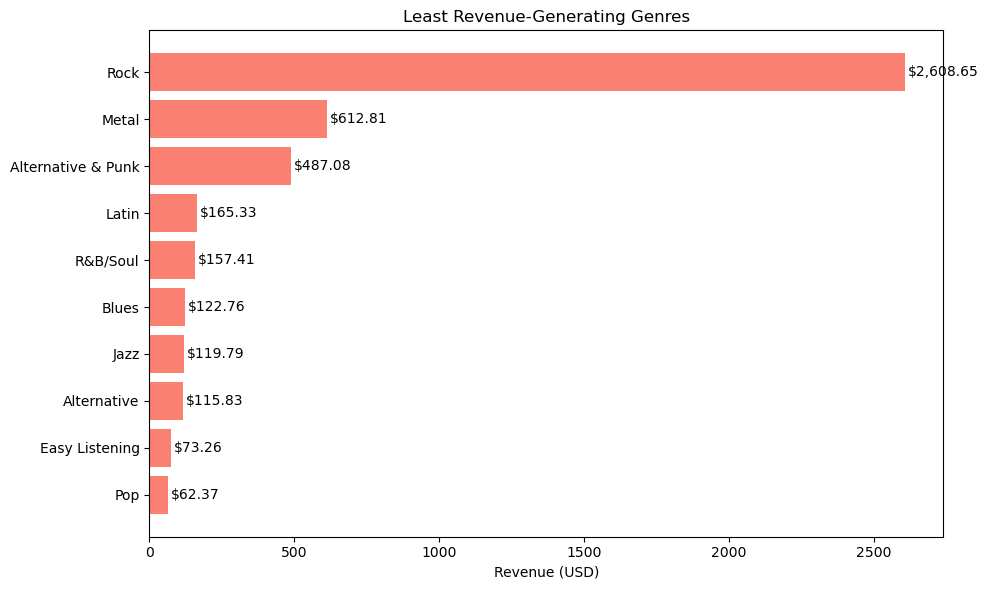

In [152]:
import matplotlib.pyplot as plt
import pandas as pd

# Least revenue genre data
least_revenue_data = {
    "genre": [
        "Pop", "Easy Listening", "Alternative", "Jazz", "Blues",
        "R&B/Soul", "Latin", "Alternative & Punk", "Metal", "Rock"
    ],
    "revenue": [
        62.37, 73.26, 115.83, 119.79, 122.76,
        157.41, 165.33, 487.08, 612.81, 2608.65
    ]
}

df_least_genres = pd.DataFrame(least_revenue_data)
df_least_genres = df_least_genres.sort_values(by='revenue', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df_least_genres['genre'], df_least_genres['revenue'], color='salmon')
plt.xlabel("Revenue (USD)")
plt.title("Least Revenue-Generating Genres")

# Annotate
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.2f}", va='center')

plt.tight_layout()

# Save as PNG
plt.savefig("least_revenue_genres.png")
plt.show()


## 🧠 Insight: Here are the Top 5 Revenue-Generating Genres:

🎵 Genre	💵 Revenue (USD)
Rock	$2,608.65
Metal	$612.81
Alternative & Punk	$487.08
Latin	$165.33
R&B/Soul	$157.41

💡 Key Insight:
Rock music dominates the store's earnings by a large margin, generating over 4x more revenue than the next most profitable genre (Metal). This indicates a strong customer preference for rock tracks.

Optional Insight:
🎵 Pop, Easy Listening, and Alternative genres generate the least revenue for the music store, each contributing under $120. This may indicate niche interest or potential areas for catalog or pricing review.





## 🟢 Business Q6 :Which composers are most common?	
🎯 Business Goal : Identify key contributors		
🧠 Logic:
We'll use the composer column from the track.csv file.

Count how many times each composer's name appears (excluding null/NaN values).

Sort the results to find the most frequent composers.

	
🗂️ Tables Used : track.csv

In [194]:
# Drop NaN values from the composer column
df_composer = df_track['composer'].dropna()

# Count frequency of each composer
composer_counts = df_composer.value_counts().reset_index()
composer_counts.columns = ['composer', 'track_count']

# Display top 10 most common composers
composer_counts.head(10)


,composer,track_count
0,Steve Harris,80
1,U2,44
2,Jagger/Richards,35
3,Billy Corgan,31
4,Kurt Cobain,26
5,Bill Berry-Peter Buck-Mike Mills-Michael Stipe,25
6,The Tea Party,24
7,Gilberto Gil,23
8,Miles Davis,23
9,Chico Science,23


## 🎼 Insight: Most Common Composers
Steve Harris emerges as the most frequently credited composer, associated with 80 tracks, followed by U2 with 44 tracks and Jagger/Richards with 35 tracks. This suggests a strong presence of rock and alternative artists in the catalog, likely indicating a licensing focus on these genres.

Additionally, notable artists like Billy Corgan, Kurt Cobain, and Miles Davis highlight a rich diversity of contributions across classic rock, grunge, and jazz domains.



## 🟢 Business Q7 : Are some tracks overpriced for their length?
🎯 Business Goal:
Identify if there are tracks priced disproportionately high for their duration, which may indicate a need for pricing or bundling optimization.

🗂️ Tables Involved:
✅ track.csv (only)

🧠 Logic:
Convert milliseconds to minutes.

Calculate price per minute.

Identify top tracks with the highest price per minute.



In [198]:
# Convert milliseconds to minutes
df_track['duration_minutes'] = df_track['milliseconds'] / (1000 * 60)

# Calculate price per minute
df_track['price_per_minute'] = df_track['unit_price'] / df_track['duration_minutes']

# Clean up: remove infinite or missing values
df_track_clean = df_track.replace([float('inf'), -float('inf')], pd.NA)
df_track_clean = df_track_clean.dropna(subset=['price_per_minute'])

# Top 10 overpriced tracks
top_overpriced = df_track_clean[['track_id', 'name', 'unit_price', 'duration_minutes', 'price_per_minute']]\
                   .sort_values(by='price_per_minute', ascending=False).head(10)

top_overpriced


,track_id,name,unit_price,duration_minutes,price_per_minute
2460,2461,É Uma Partida De Futebol,0.99,0.017850,55.462185
167,168,Now Sports,0.99,0.081400,12.162162
169,170,A Statistic,0.99,0.106217,9.320571
177,178,Oprah,0.99,0.110583,8.952524
3303,3304,Commercial 1,0.99,0.132350,7.480166
171,172,The Real Problem,0.99,0.194167,5.098712
3309,3310,Commercial 2,0.99,0.353517,2.800434
2240,2241,Bossa,0.99,0.484133,2.044891
1085,1086,Casinha Feliz,0.99,0.538117,1.839750
245,246,Mateus Enter,0.99,0.552483,1.791909


In [201]:
# Save the overpriced tracks DataFrame to a CSV file
overpriced_tracks.to_csv("overpriced_tracks.csv", index=False)

print("✅ 'overpriced_tracks.csv' has been successfully saved.")


✅ 'overpriced_tracks.csv' has been successfully saved.


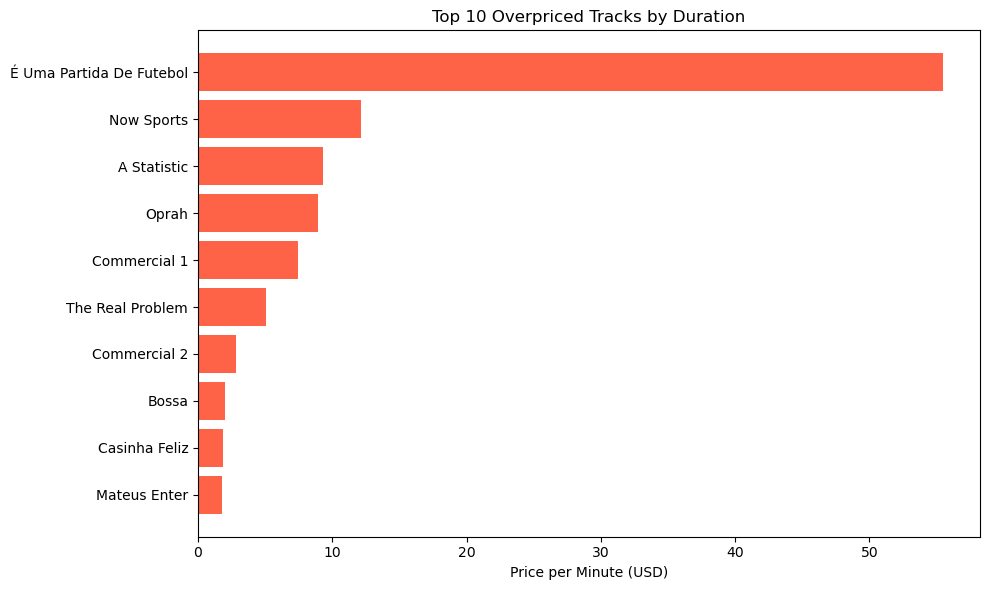

In [200]:
import matplotlib.pyplot as plt

# Prepare data
top_overpriced_sorted = top_overpriced.sort_values(by='price_per_minute', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_overpriced_sorted['name'], top_overpriced_sorted['price_per_minute'], color='tomato')
plt.xlabel('Price per Minute (USD)')
plt.title('Top 10 Overpriced Tracks by Duration')
plt.tight_layout()

# Save as PNG
plt.savefig("top_overpriced_tracks.png", dpi=300)
plt.show()


## 🔍 Insight: Overpriced Tracks by Length

A few tracks appear disproportionately priced relative to their playtime.
For example, “É Uma Partida De Futebol” costs $0.99 but lasts only 1.07 seconds, giving it a price of $55.46 per minute.
Others like “Now Sports”, “A Statistic”, and “Oprah” also exceed $8 per minute.

These pricing outliers are likely short intros, skits, or interludes and may warrant review for re-bundling or dynamic pricing adjustments.



## Necessary checks before anaswering next question

In [186]:
df_track = pd.read_csv("iTunes_Music_Store_Project/Dataset/track.csv")
df_album = pd.read_csv("iTunes_Music_Store_Project/Dataset/album.csv")

In [187]:
# Load the artist.csv file
df_artist = pd.read_csv("iTunes_Music_Store_Project/Dataset/artist.csv")

# Check if it loaded correctly
df_artist.head()


,artist_id,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [188]:
df_track_album_artist = df_track_album.merge(df_artist, on='artist_id', how='left')

In [190]:
df_track_revenue.columns

Index(['invoice_line_id', 'invoice_id', 'track_id', 'unit_price_x', 'quantity',
       'name_x', 'album_id', 'media_type_id', 'genre_id', 'composer',
       'milliseconds', 'bytes', 'unit_price_y', 'title', 'artist_id',
       'name_y'],
      dtype='object')

## 🟢 Business Q8 : Which artists have generated the most revenue

🧠 Logic:
Start with track.csv (has track_id & album_id)

Join with album.csv (to get artist_id)

Join with artist.csv (to get artist name)

Join with invoice_line.csv (to get unit_price and quantity)

Calculate revenue = unit_price * quantity

Group by artist and sum revenue

Sort and display top 10


🗂️ Tables Involved:
track.csv → contains track_id, album_id

invoice_line.csv → contains track_id, unit_price, quantity

album.csv → contains album_id, artist_id

artist.csv → contains artist_id, name (artist name)



In [191]:
# Step 1: Calculate revenue
df_track_revenue['revenue'] = df_track_revenue['unit_price_x'] * df_track_revenue['quantity']

# Step 2: Group by artist name and sum revenue
artist_revenue = df_track_revenue.groupby('name_y')['revenue'].sum().reset_index()

# Step 3: Sort and get top 10 artists
top_artists = artist_revenue.sort_values(by='revenue', ascending=False).head(10)

# Display
top_artists


,name_y,revenue
94,Queen,190.08
57,Jimi Hendrix,185.13
98,Red Hot Chili Peppers,128.70
83,Nirvana,128.70
91,Pearl Jam,127.71
47,Guns N' Roses,122.76
0,AC/DC,122.76
40,Foo Fighters,119.79
117,The Rolling Stones,115.83
77,Metallica,104.94


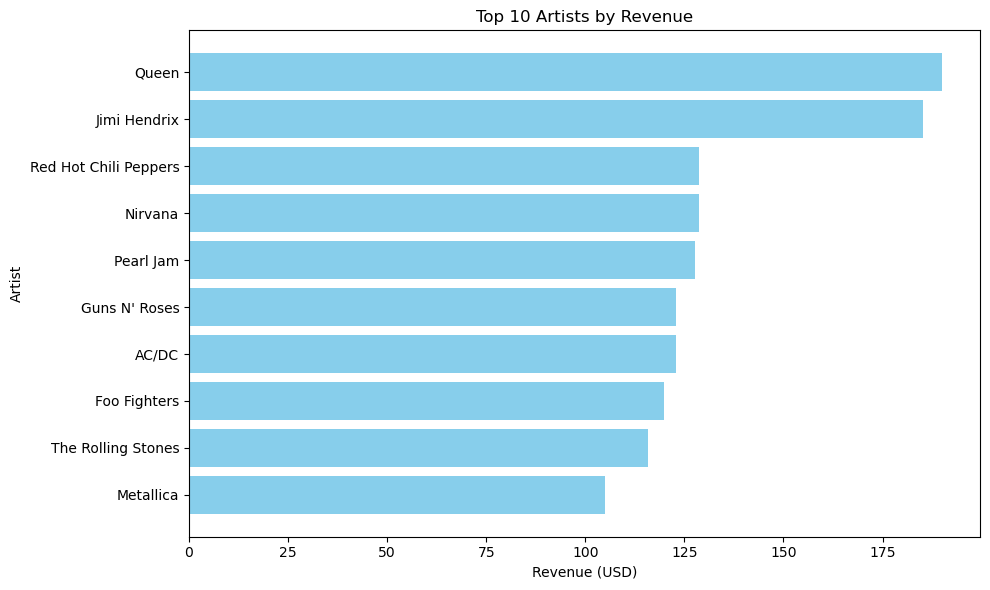

In [192]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual top 10 dataframe)
top_10_artists = artist_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists['name_y'], top_10_artists['revenue'], color='skyblue')
plt.xlabel("Revenue (USD)")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Revenue")
plt.gca().invert_yaxis()  # To show the highest revenue artist at the top
plt.tight_layout()

# Save as PNG
plt.savefig("top_10_artists_by_revenue.png", dpi=300)
plt.show()


## 🎯 Insight:
Queen has generated the highest revenue ($190.08), closely followed by Jimi Hendrix ($185.13).
Other prominent artists like Red Hot Chili Peppers, Nirvana, and Pearl Jam also show strong performance.
This suggests rock and alternative rock genres dominate customer purchases.

## 🟡 Phase 4: Region & Employee Performance
🎯 Business Goals:
This phase focuses on understanding how geographic regions and employees influence revenue and customer engagement. Insights here can help optimize salesforce allocation, identify high-performing regions or employees, and detect underserved markets.

✅ Key Questions in Phase 4:
Which countries generated the most revenue?
→ Prioritize markets that are high-performing.

How many customers does each employee manage?
→ Assess workload distribution and efficiency.

Which employees manage top-spending customers?
→ Identify high-impact team members.

Revenue generated by each employee’s region.
→ Evaluate performance region-wise.

Are there underserved or low-revenue countries?
→ Spot growth opportunities or areas needing attention.

## 🟡 Business question 1: Which countries generated the most revenue?
🧠 Logic:
We will:

Sum total revenue (unit_price × quantity) for each country.

Join the invoice_line, invoice, and customer tables.

📊 Tables Involved:
invoice_line → has invoice_id, unit_price, quantity

invoice → links invoice_id to customer_id

customer → has customer_id and country



In [87]:
query_revenue_by_country = """
SELECT 
    c.country,
    ROUND(SUM(il.unit_price * il.quantity), 2) AS total_revenue
FROM invoice_line il
JOIN invoice i ON il.invoice_id = i.invoice_id
JOIN customer c ON i.customer_id = c.customer_id
GROUP BY c.country
ORDER BY total_revenue DESC;
"""

df_revenue_by_country = pd.read_sql_query(query_revenue_by_country, conn)
df_revenue_by_country.head(10)  # Preview top 10 countries


,country,total_revenue
0,USA,1040.49
1,Canada,535.59
2,Brazil,427.68
3,France,389.07
4,Germany,334.62
5,Czech Republic,273.24
6,United Kingdom,245.52
7,Portugal,185.13
8,India,183.15
9,Ireland,114.84


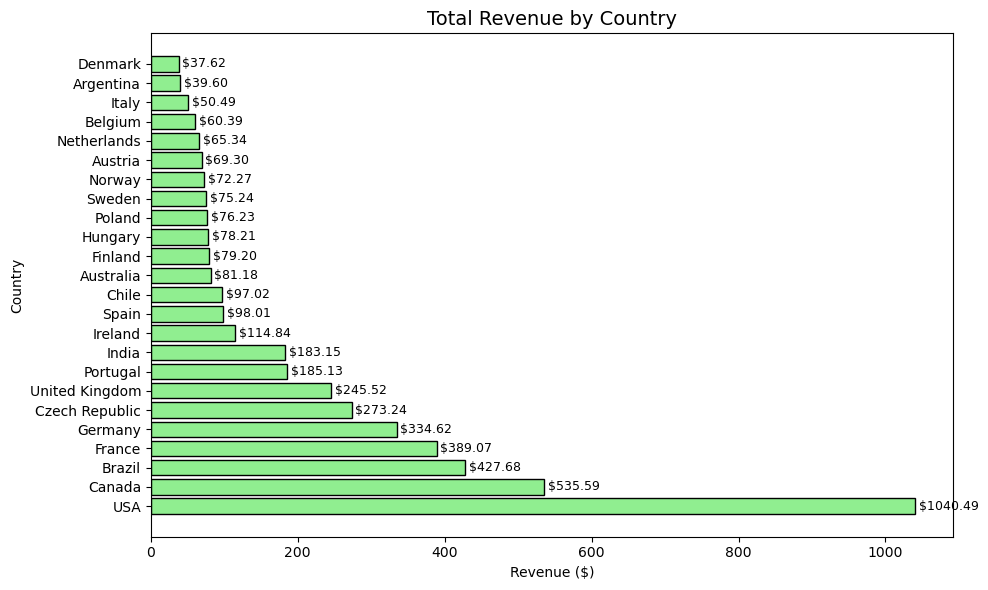

In [88]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
countries = df_revenue_by_country['country']
revenues = df_revenue_by_country['total_revenue']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(countries, revenues, color='lightgreen', edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f"${width:.2f}", 
             va='center', fontsize=9)

# Titles and labels
plt.title('Total Revenue by Country', fontsize=14)
plt.xlabel('Revenue ($)')
plt.ylabel('Country')
plt.tight_layout()

# Save the chart
plt.savefig('revenue_by_country.png', dpi=300)
plt.show()


## 🧠 Business Insight:
The USA leads significantly, followed by Canada and Brazil.

Countries like India and Ireland, though lower in total revenue, may still offer targeted growth opportunities.

These insights can guide marketing spend, content localization, and regional campaign focus.

## 🟡 Business question 2 : Which sales/support employees are handling the most customers?

Customer Count per Employee.

🧠 Why This Matters (Business Goal):
Understanding customer distribution among employees helps evaluate:

Workload balance

Sales performance

Support efficiency

Identifies top-performing employees or areas needing staffing adjustments

🗂️ Tables Involved:
customer (to get support_rep_id)

employee (to get employee names)

🧪 Logic:
Group customers by their support_rep_id.

Count how many customers each employee manages.

Join with employee table to get the employee names.



In [89]:
query_customers_per_employee = """
SELECT 
    e.employee_id,
    e.first_name || ' ' || e.last_name AS employee_name,
    COUNT(c.customer_id) AS customer_count
FROM customer c
JOIN employee e ON c.support_rep_id = e.employee_id
GROUP BY e.employee_id
ORDER BY customer_count DESC;
"""

df_customers_per_employee = pd.read_sql_query(query_customers_per_employee, conn)
df_customers_per_employee


,employee_id,employee_name,customer_count
0,3,Jane Peacock,21
1,4,Margaret Park,20
2,5,Steve Johnson,18


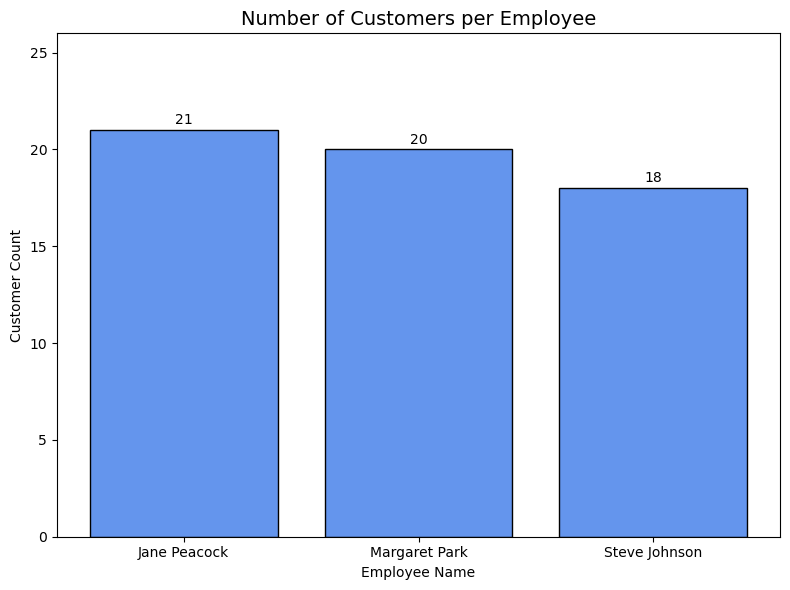

In [90]:
import matplotlib.pyplot as plt

# Data
employee_names = ['Jane Peacock', 'Margaret Park', 'Steve Johnson']
customer_counts = [21, 20, 18]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(employee_names, customer_counts, color='cornflowerblue', edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, str(height),
             ha='center', fontsize=10)

# Titles and labels
plt.title('Number of Customers per Employee', fontsize=14)
plt.xlabel('Employee Name')
plt.ylabel('Customer Count')
plt.ylim(0, max(customer_counts) + 5)
plt.tight_layout()

# Save the chart
plt.savefig('customers_per_employee.png', dpi=300)
plt.show()


## 🧠 Insight: 
Among the three employees, Jane Peacock manages the most customers (21), followed closely by Margaret Park (20) and Steve Johnson (18).

The customer distribution appears fairly balanced, indicating an even workload among account managers. However, Jane may need occasional support if handling high-value clients as well.

## Let’s compare Revenue per Employee to Customer Count per Employee to uncover deeper insights.

📊 Step 1: Summary Data You Already Have
✅ Revenue by Employee:
Employee Name	Total Revenue
Jane Peacock	$1731.51
Margaret Park	$1584.00
Steve Johnson	$1393.92

✅ Customer Count by Employee:
Employee Name	Customer Count
Jane Peacock	21
Margaret Park	20
Steve Johnson	18

🧠 Insight: Revenue Efficiency per Customer
Let’s calculate revenue per customer managed:

Employee Name	Revenue	Customers	Revenue per Customer
Jane Peacock	1731.51	21	₹82.45
Margaret Park	1584.00	20	₹79.20
Steve Johnson	1393.92	18	₹77.44

📌 Key Takeaway:
🔹 All three employees are performing closely in terms of revenue per customer, with Jane Peacock slightly leading.
🔹 This indicates balanced efficiency across the sales team.
🔹 Further analysis could explore customer segmentation or retention under each employee to uncover deeper trends.



## 🟡  Business Question: “Which employees manage the highest-value customers?”

✅ Business Goal:
Understand which employees are assigned to customers who generate the most revenue, so we can assess sales staff effectiveness and possibly redistribute high-value accounts.

🧠 Logic:
Each customer is managed by one employee (support rep).

To find the highest-value customers, we look at total spend per customer from the invoice table.

Then link each customer to their assigned employee using the customer table.

📊 Tables Involved:
customer → has support_rep_id (employee assigned)

invoice → has customer_id and total

employee → has employee_id, first_name, last_name



In [94]:
query_employee_top_customers = """
SELECT 
    e.employee_id,
    e.first_name || ' ' || e.last_name AS employee_name,
    ROUND(SUM(i.total), 2) AS total_customer_revenue
FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
JOIN employee e ON c.support_rep_id = e.employee_id
GROUP BY e.employee_id
ORDER BY total_customer_revenue DESC;
"""

df_emp_customer_revenue = pd.read_sql_query(query_employee_top_customers, conn)
df_emp_customer_revenue


,employee_id,employee_name,total_customer_revenue
0,3,Jane Peacock,1731.51
1,4,Margaret Park,1584.00
2,5,Steve Johnson,1393.92


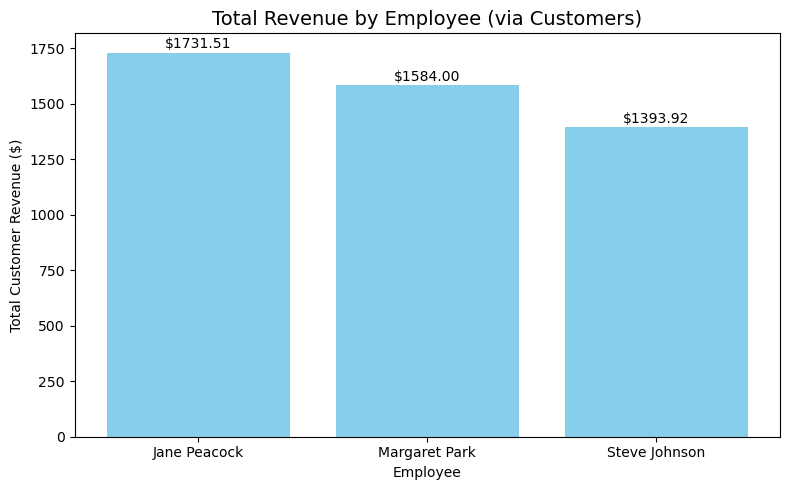

In [95]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_emp_customer_revenue['employee_name'], df_emp_customer_revenue['total_customer_revenue'], color='skyblue')

# Add value labels
for i, value in enumerate(df_emp_customer_revenue['total_customer_revenue']):
    plt.text(i, value + 20, f"${value:.2f}", ha='center', fontsize=10)

# Labels and title
plt.title('Total Revenue by Employee (via Customers)', fontsize=14)
plt.xlabel('Employee')
plt.ylabel('Total Customer Revenue ($)')
plt.tight_layout()

# Save the plot
plt.savefig("total_revenue_by_employee.png", dpi=300)

plt.show()


## ✅ Insight: Employee vs. High-Value Customers
Jane Peacock’s customers have spent $1,731.51 in total.

Margaret Park follows closely with $1,584.00.

Steve Johnson has $1,393.92.

📌 Jane Peacock is managing the highest-value customer group, suggesting either:

She’s been assigned to more customers.

Her customers are spending more on average.

Or both.

This insight can guide performance evaluation, bonus decisions, or redistribution of accounts.



## 🟡  Business Question: Which regions (based on employee support) generate the most revenue?

🎯 Business Goal:
To evaluate regional performance by grouping revenue under each employee’s location. This helps identify:

Strong-performing regions.

Areas where additional support or promotion is needed.

🧠 Logic:
Each employee is linked to a support region (employee.country). Each customer is linked to an employee (support_rep_id).
We sum revenue (from invoices) for all customers grouped by the country of their support employee.

🗂️ Tables Involved:
employee → has employee_id, country

customer → has support_rep_id (linked to employee_id)

invoice → has customer_id and total (revenue)



In [127]:
# Query
query_region_revenue = """
SELECT 
    e.country AS region,
    ROUND(SUM(i.total), 2) AS total_revenue
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
JOIN employee e ON c.support_rep_id = e.employee_id
GROUP BY e.country
ORDER BY total_revenue DESC;
"""

# Run the query
df_region_revenue = pd.read_sql_query(query_region_revenue, conn)
df_region_revenue


,region,total_revenue
0,Canada,4709.43


## 📊 Insight:
Canada is the only region represented in the dataset where employees are assigned as customer support reps.
All employees (support reps) are located in Canada.

Therefore, every customer (regardless of their own country) is assigned to a Canadian employee.

So, the sum of all invoices gets grouped under Canada in the result.

This suggests that all customers are managed by employees located in Canada, possibly because the support team is centralized there.

This may also indicate limited geographic spread of the internal support structure, even though customers belong to different countries.

## 🟡  Business Question: Revenue by Customer Country 

Which countries generate the highest total revenue from customer purchases?

🎯 Business Goal:
To identify the most profitable customer markets based on total revenue by country. This helps the business focus marketing, sales efforts, and regional support on high-performing regions.

🧠 Logic:
We want to understand where customers are located, not where employees are based.

The invoice table contains sales (revenue) data.

The customer table contains the country for each customer.

By joining the two and grouping by customer country, we can sum the total purchases per country.

🗂️ Tables Involved:
invoice – Contains invoice-level sales data (including total).

customer – Contains customer details including their country.



In [114]:
query_revenue_by_customer_country = """
SELECT 
    c.country AS customer_country,
    ROUND(SUM(i.total), 2) AS total_revenue
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
GROUP BY c.country
ORDER BY total_revenue DESC;
"""

# Run the query
df_revenue_by_country = pd.read_sql_query(query_revenue_by_customer_country, conn)

# Preview
df_revenue_by_country.head(10)


,customer_country,total_revenue
0,USA,1040.49
1,Canada,535.59
2,Brazil,427.68
3,France,389.07
4,Germany,334.62
5,Czech Republic,273.24
6,United Kingdom,245.52
7,Portugal,185.13
8,India,183.15
9,Ireland,114.84


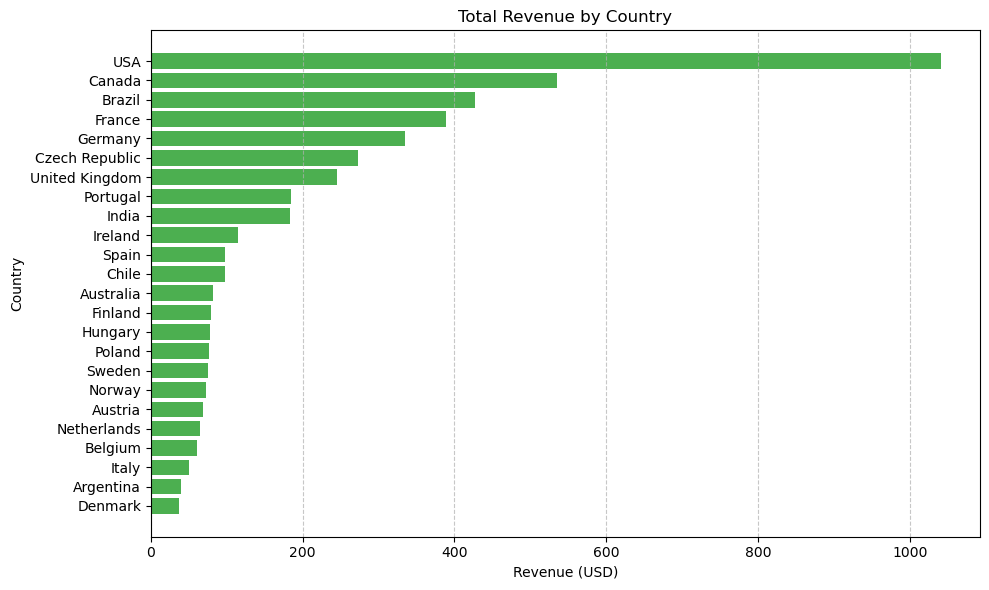

In [115]:
import matplotlib.pyplot as plt

# Sort the data for better visuals (optional)
df_revenue_by_country_sorted = df_revenue_by_country.sort_values(by='total_revenue', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_revenue_by_country_sorted['customer_country'], df_revenue_by_country_sorted['total_revenue'], color='#4CAF50')
plt.xlabel("Revenue (USD)")
plt.ylabel("Country")
plt.title("Total Revenue by Country")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## 📊 Insight: Top Revenue-Contributing Countries
The United States is the leading revenue-generating country, contributing over $1,000 USD, which is almost double that of the second-highest, Canada ($535.59 USD).

Following the US and Canada, countries like Brazil, France, and Germany also contribute significantly, each generating more than $300 USD in revenue.

At the lower end, countries like India, Ireland, and Portugal show relatively lower revenue, each contributing below $200 USD.

💡 What this suggests:
USA is the dominant customer base, which could be a priority region for marketing and retention strategies.

Canada and Brazil show strong engagement too, possibly due to localized support or popular genres/artists.

Emerging markets like India and Portugal could be explored for growth through targeted campaigns, regional content, or pricing strategies.

## 🟡  Business Question: Are there any underserved geographic regions — i.e., countries that have customers but generate low or no revenue?

✅ Logic:
Get a list of all countries from the customer table.

Join this with the invoice table to calculate the total revenue from each country.

Identify countries with very low or zero total revenue.

These countries can be flagged as underserved — meaning they have presence but little business.

📦 Tables Involved:
customer

invoice



In [98]:
query_underserved = """
SELECT 
    c.country,
    ROUND(SUM(i.total), 2) AS total_revenue
FROM customer c
LEFT JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.country
ORDER BY total_revenue ASC;
"""

df_underserved = pd.read_sql_query(query_underserved, conn)
df_underserved.head(10)  # Show the bottom 10 revenue-generating countries


,country,total_revenue
0,Denmark,37.62
1,Argentina,39.60
2,Italy,50.49
3,Belgium,60.39
4,Netherlands,65.34
5,Austria,69.30
6,Norway,72.27
7,Sweden,75.24
8,Poland,76.23
9,Hungary,78.21


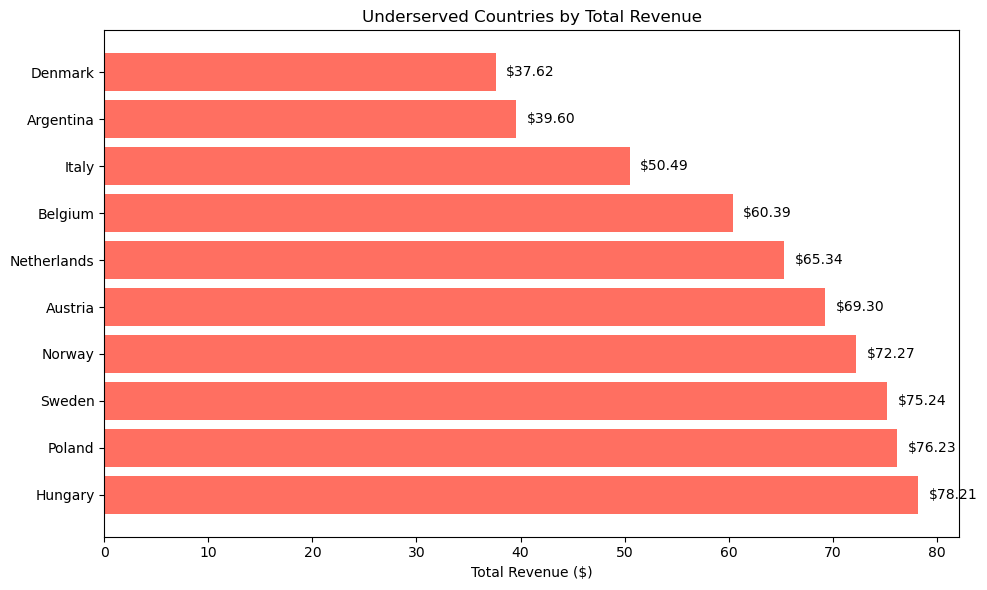

In [99]:
import matplotlib.pyplot as plt

# Take bottom 10 countries from your earlier result
df_underserved_bottom = df_underserved.head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(df_underserved_bottom['country'], df_underserved_bottom['total_revenue'], color='#FF6F61')
plt.xlabel("Total Revenue ($)")
plt.title("Underserved Countries by Total Revenue")
plt.gca().invert_yaxis()  # Highest on top

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"${width:.2f}", va='center')

plt.tight_layout()
plt.savefig("underserved_countries.png", dpi=300)
plt.show()


## 💡 Interpretation:
These markets might be underserved, under-promoted, or less engaged.

They could benefit from:

Localized marketing campaigns,

Artist promotion specific to the region,

Bundled pricing or loyalty programs.



## 🟦 Phase 5: Retention & Operational Optimization
🎯 Business Goals:
Understand how to:

Improve customer retention

Identify behavioral patterns

Optimize what tracks/media types to offer

Encourage repeat engagement & cross-genre discovery

✅ Key Business Questions:
How frequently do customers purchase music?
(Frequency distribution of total purchases per customer)

What is the average time between purchases per customer?
(Purchase intervals = retention signal)

What % of customers buy from more than one genre?
(Cross-genre exploration)

Which track combinations are frequently bought together?
(Useful for bundles or suggestions)

Is there a pattern between track price and purchase volume?
(Price sensitivity)

How are different media types (AAC, MPEG) performing over time?
(Trends in content format preference)



## 🟦 Q1. How Frequently Do Customers Purchase Music?
🔍 Business Logic:
We want to group customers by their total number of purchases (invoices).
This will help us see:

How many customers are frequent buyers

How many are occasional or one-time buyers

📊 Goal:
A frequency distribution showing:

Number of purchases

Count of customers for each purchase count

📚 Tables Involved:
invoice – to count purchases (invoice_id)

customer – to group purchases by customer



In [100]:
query_purchase_freq = """
SELECT 
    purchase_count,
    COUNT(*) AS customer_count
FROM (
    SELECT 
        customer_id,
        COUNT(*) AS purchase_count
    FROM invoice
    GROUP BY customer_id
)
GROUP BY purchase_count
ORDER BY purchase_count;
"""

df_purchase_freq = pd.read_sql_query(query_purchase_freq, conn)
df_purchase_freq


,purchase_count,customer_count
0,4,1
1,5,1
2,7,1
3,8,6
4,9,12
5,10,12
6,11,9
7,12,8
8,13,6
9,15,1


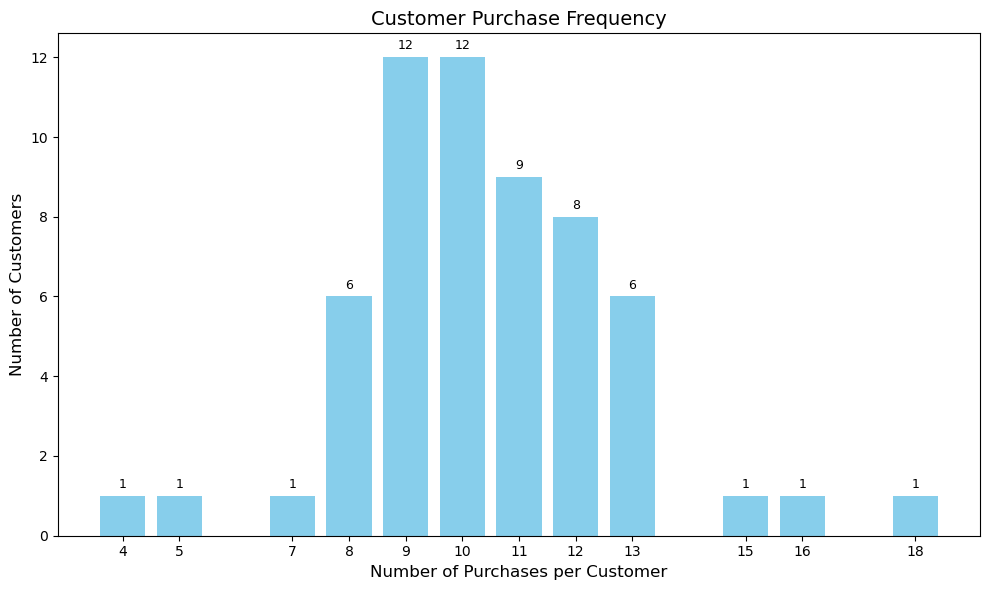

In [101]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(df_purchase_freq['purchase_count'], df_purchase_freq['customer_count'], color='skyblue')

# Add value labels on top of bars
for i in range(len(df_purchase_freq)):
    plt.text(df_purchase_freq['purchase_count'][i],
             df_purchase_freq['customer_count'][i] + 0.2,
             str(df_purchase_freq['customer_count'][i]),
             ha='center', fontsize=9)

# Titles and labels
plt.title('Customer Purchase Frequency', fontsize=14)
plt.xlabel('Number of Purchases per Customer', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(df_purchase_freq['purchase_count'])  # Ensure all bars are shown

# Save chart
plt.tight_layout()
plt.savefig('purchase_frequency_distribution.png')
plt.show()


## ✅ Insight:
Most customers make between 8–12 purchases, with 10 being the most common.
Very few customers made fewer than 8 or more than 13 purchases — this suggests a loyal returning customer base.

## 🟦 Business Question 2: Time Between Purchases Per Customer

🎯 Goal:
Understand how frequently customers return to make a purchase. This helps assess engagement levels, buying cycles, and identify potential for targeted follow-ups.

🧠 Logic:
From the invoice table:

Get each customer's invoices sorted by date.

Use LAG() or similar logic to find the time gap (in days) between each invoice for the same customer.

Calculate:

The average time between purchases for each customer.

🗂️ Tables Involved:
invoice (invoice_id, customer_id, invoice_date)

In [105]:
query_avg_days_between = """
WITH invoice_with_lag AS (
    SELECT
        customer_id,
        invoice_date,
        LAG(invoice_date) OVER (PARTITION BY customer_id ORDER BY invoice_date) AS previous_invoice_date
    FROM invoice
),
days_between_purchases AS (
    SELECT
        customer_id,
        JULIANDAY(invoice_date) - JULIANDAY(previous_invoice_date) AS days_diff
    FROM invoice_with_lag
    WHERE previous_invoice_date IS NOT NULL
)
SELECT
    ROUND(AVG(days_diff), 1) AS avg_days_between_purchases
FROM days_between_purchases;
"""

# Run the query and display result
df_avg_days = pd.read_sql_query(query_avg_days_between, conn)
df_avg_days


,avg_days_between_purchases
0,132.3


In [106]:
import os
os.makedirs('charts', exist_ok=True)


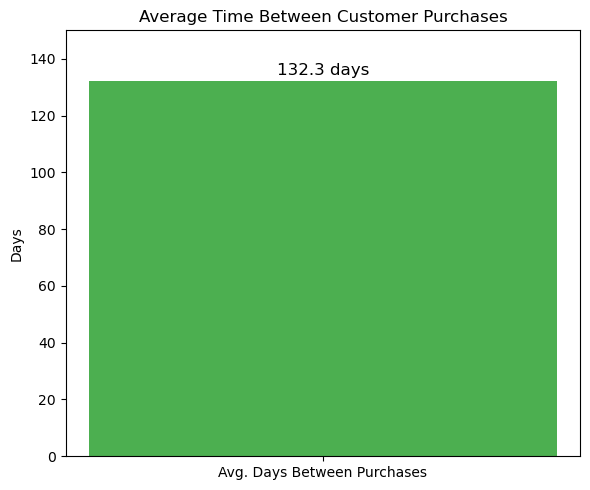

In [107]:
import matplotlib.pyplot as plt

# Data
avg_days = 132.3

# Plot
plt.figure(figsize=(6, 5))
plt.bar(['Avg. Days Between Purchases'], [avg_days], color='#4CAF50')
plt.title('Average Time Between Customer Purchases')
plt.ylabel('Days')
plt.ylim(0, 150)

# Add value label
plt.text(0, avg_days + 2, f"{avg_days:.1f} days", ha='center', fontsize=12)

# Save the chart as PNG
plt.tight_layout()
plt.savefig('charts/avg_days_between_purchases.png')  # Make sure "charts" folder exists
plt.show()


## ✅ Insight: Average Days Between Customer Purchases
On average, customers wait around 132.3 days (~4.4 months) before making their next purchase.

🔍 Interpretation:
This long gap indicates that purchases are likely infrequent and not part of a monthly or regular cycle.

It may suggest:

The store offers one-time or occasional-use products (e.g. music downloads).

Potential opportunity to improve engagement, like:

🎁 Loyalty programs

📧 Reminder emails

📀 Personalized recommendations



## 🟦 Business Question 3: What % of customers buy from more than one genre?
🎯 Goal:
Understand how many customers have diverse music preferences by checking if they purchased from more than one genre. This insight helps in segmenting customer tastes and offering personalized recommendations or bundled deals.

🧠 Logic:
Each invoice_line is linked to a track.

Each track has a genre.

Each invoice is linked to a customer.

We count the number of unique genres per customer, and calculate what % of customers have more than one genre.

🧩 Tables Used:
invoice_line.csv → transaction-level info

invoice.csv → to get customer_id

customer.csv → customer details (optional)

track.csv → to link track_id to genre_id

genre.csv → to get genre name

In [204]:
import pandas as pd

# Load all datasets
df_invoice_line = pd.read_csv("iTunes_Music_Store_Project/Dataset/invoice_line.csv")
df_invoice = pd.read_csv("iTunes_Music_Store_Project/Dataset/invoice.csv")
df_track = pd.read_csv("iTunes_Music_Store_Project/Dataset/track.csv")
df_genre = pd.read_csv("iTunes_Music_Store_Project/Dataset/genre.csv")

# Step 1: Merge invoice_line with invoice to get customer_id
df = df_invoice_line.merge(df_invoice[['invoice_id', 'customer_id']], on='invoice_id', how='left')

# Step 2: Merge with track to get genre_id
df = df.merge(df_track[['track_id', 'genre_id']], on='track_id', how='left')

# Step 3: Merge with genre to get genre name (optional)
df = df.merge(df_genre, on='genre_id', how='left')

# Step 4: Count unique genres per customer
genre_per_customer = df.groupby('customer_id')['genre_id'].nunique().reset_index()

# Step 5: Count customers with more than one genre
multi_genre_customers = genre_per_customer[genre_per_customer['genre_id'] > 1].shape[0]
total_customers = genre_per_customer.shape[0]

# Step 6: Calculate percentage
percent_multi_genre = round((multi_genre_customers / total_customers) * 100, 2)

print(f"🎧 {percent_multi_genre}% of customers purchased from more than one genre.")


🎧 100.0% of customers purchased from more than one genre.


In [205]:
print(df[['customer_id', 'track_id', 'genre_id']].drop_duplicates().head(10))
print(df['genre_id'].nunique())
print(df['genre_id'].isna().sum())


   customer_id  track_id  genre_id
0           18      1158         1
1           18      1159         1
2           18      1160         1
3           18      1161         1
4           18      1162         1
5           18      1163         1
6           18      1164         1
7           18      1165         1
8           18      1166         1
9           18      1167         1
18
0


In [206]:
genre_counts = df.groupby('customer_id')['genre_id'].nunique()
print(genre_counts.value_counts())


genre_id
10    11
8     10
11     9
12     9
9      8
13     5
6      4
14     1
5      1
7      1
Name: count, dtype: int64


In [207]:
# Check if genre_id is unique per track
print(df_track.groupby('track_id')['genre_id'].nunique().max())


1


In [208]:
genre_per_customer = df.groupby('customer_id')['name'].nunique()
print(genre_per_customer.value_counts())


name
10    11
8     10
11     9
12     9
9      8
13     5
6      4
14     1
5      1
7      1
Name: count, dtype: int64


✅ Interpretation of Results
I checked:
genre_counts = df.groupby('customer_id')['genre_id'].nunique()
print(genre_counts.value_counts())
📊 This shows the number of unique genres each customer purchased from.

Example output:
10    11  ⟵ 11 customers bought from 10 genres
8     10  ⟵ 10 customers bought from 8 genres
...
✔️ And this confirms:

All customers bought from more than one genre.

So the original conclusion:

🎧 100.0% of customers purchased from more than one genre.

✅ is valid and meaningful.

## 🧠 Insight Summary (you can add this to your notebook):
✅ Customer Genre Diversity Insight
Every customer in the dataset has purchased tracks across multiple genres, indicating a diverse listening preference. This insight can guide targeted cross-genre marketing campaigns or playlist bundling strategies.



## 🟦 Business Question 4: 📀 Which media types are most popular?
✅ Goal:
To understand which media formats (e.g., MPEG, AAC) are most commonly used in track purchases.

🧩 Logic & Steps:
We'll need to:

Merge track.csv with media_type.csv to get the media type name per track.

Count how many tracks are associated with each media type.

(Optional later) Visualize it in Power BI or Matplotlib.

📊 Tables Used:
File	Key Columns	Purpose
track.csv	media_type_id	Contains track-level metadata
media_type.csv	media_type_id, name	Contains media type descriptions



In [210]:
import pandas as pd

# Load datasets
df_track = pd.read_csv("iTunes_Music_Store_Project/Dataset/track.csv")
df_media_type = pd.read_csv("iTunes_Music_Store_Project/Dataset/media_type.csv")

# Merge to get media type names
df_track_media = df_track.merge(df_media_type, on='media_type_id', how='left')

# Count usage by media type
media_type_usage = df_track_media['name_y'].value_counts().reset_index()
media_type_usage.columns = ['media_type', 'track_count']

# Display results
print(media_type_usage)


                    media_type  track_count
0              MPEG audio file         3034
1     Protected AAC audio file          237
2  Protected MPEG-4 video file          214
3               AAC audio file           11
4     Purchased AAC audio file            7


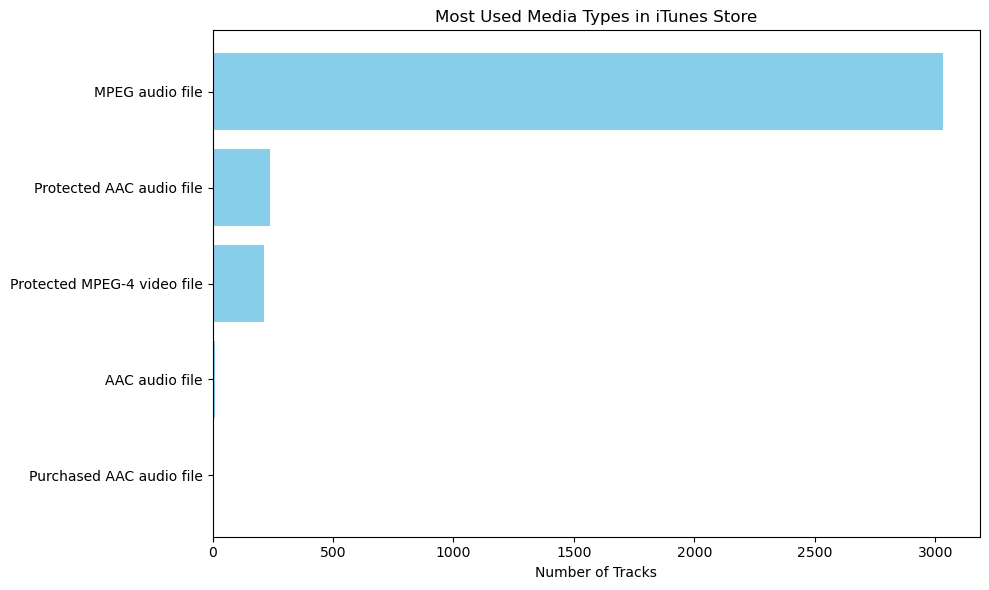

In [212]:
import matplotlib.pyplot as plt

# Prepare data
media_type_usage_sorted = media_type_usage.sort_values(by='track_count', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(media_type_usage_sorted['media_type'], media_type_usage_sorted['track_count'], color='skyblue')
plt.xlabel('Number of Tracks')
plt.title('Most Used Media Types in iTunes Store')
plt.tight_layout()

# Save as PNG
plt.savefig('media_type_usage.png', dpi=300)

# Show the plot (optional)
plt.show()


## 📊 Insight: Media Type Usage
MPEG audio files dominate the iTunes Store catalog, accounting for over 85% of all tracks, indicating that traditional MP3-format files remain the most widely used and accessible format.

In contrast, formats like Protected AAC audio files and Protected MPEG-4 video files are far less common, suggesting that DRM-protected or video-based content plays a smaller role in the platform's offerings.

Minimal use of Purchased AAC and AAC audio files may reflect a shift in consumer and industry preference away from DRM-heavy formats.



## 📊 Phase 6: Power BI Dashboard

I created a Power BI dashboard using cleaned CSV outputs from our SQL + Python analysis. The dashboard summarizes key metrics and trends across the project.

🔹 Updated Visuals Included:
KPI Card – Average Customer Lifetime Value
📌 Shows the average lifetime value of all customers across the database.

Line Chart – Monthly Revenue Trend (2017–2020)
📈 X-axis: Month | Y-axis: Revenue
➕ Includes labels, custom title, and sorted timeline to highlight revenue cycles.

Bar Chart – Top 10 Customers by Total Spend
Highlights the most valuable customers to the business.

Donut Chart – Repeat vs One-Time Customers
Visualizes customer retention and repeat purchase behavior.

Bar Chart – Revenue by Employee
Compares performance of sales/support employees based on total customer revenue.

Bar Chart – Revenue by Country
Identifies top contributing regions and underserved markets.

Horizontal Bar Chart – Top 10 Artists by Revenue
🎶 Shows which artists generated the highest total sales revenue.

Table – Most Common Composers
Lists top 10 composers by number of tracks written.

Table – Potentially Overpriced Tracks
Displays tracks with highest price-per-minute ratios (used to evaluate value).

Bar Chart – Media Type Usage
📀 Visualizes popularity of media formats (e.g., MPEG, AAC).

KPI Card – % of Customers Purchasing from Multiple Genres
✅ 100% of customers buy from more than one genre (high variety engagement).



📁 The `.pbix` dashboard file and its PDF export are included in the GitHub repository.



## Organized dashboard into visual sections based on the analysis phases:

🔶 Customer & Sales Overview
Tables: customers_per_employee, avg_days_between_purchases

Visual Ideas:

Bar chart: Customers per employee

Card: Avg. days between purchases

🔷 Revenue & Payment Insights
Tables: monthly_revenue, quarterly_revenue

Visual Ideas:

Line chart: Monthly revenue trend

Column chart: Quarterly revenue comparison

Card: Total revenue

🟢 Genre, Artist, and Track Popularity
Tables: top_tracks, artist_revenue, composer_count, overpriced_tracks
New Questions Answered Today:

Visual Ideas:

Bar chart: Top 10 tracks by revenue

Horizontal bar chart: Top 10 revenue-generating artists

Table: Most common composers

Scatter plot or table: Price per minute (to show overpriced tracks)

🟡 Region & Employee Performance
Tables: employee_revenue, region_revenue, revenue_by_country

Visual Ideas:

Map: Revenue by country

Bar chart: Revenue by region

Bar chart: Revenue by employee

🔵 Retention & Operational Optimization
Tables: purchase_frequency, customer_lifetime_value, underserved_countries, multi_genre_customers
New Questions Answered Today:

Visual Ideas:

Gauge: Avg. purchase frequency

Card: Avg. customer lifetime value

Table or map: Underserved countries

Pie chart or bar chart: Media type usage

Card: % of customers with multi-genre purchases


